# **Loading Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sys
import plotly.express as px
from numpy import random

# **Loading Datasets**

## **[Amazon medical equipment](https://www.kaggle.com/ishandutta/amazon-covid19-predatory-pricing-data)**

In [ ]:
amz_med1=pd.read_csv('https://raw.githubusercontent.com/DeepanNarayanaMoorthy/Effect-of-COVID-19-pandemic-on-E-commerce/master/datasets/amazon_predatory_final_nostars.csv')
amz_med2=pd.read_csv('https://raw.githubusercontent.com/DeepanNarayanaMoorthy/Effect-of-COVID-19-pandemic-on-E-commerce/master/datasets/amazon_2020_03_09_1.csv')
amz_med3=pd.read_csv('https://raw.githubusercontent.com/DeepanNarayanaMoorthy/Effect-of-COVID-19-pandemic-on-E-commerce/master/datasets/amazon_predatory_final_stars.csv')
print(amz_med3.columns)
print(amz_med2.columns)
print(amz_med1.columns)
amz_med2['mrp_then']=amz_med2['mrp']
amz_med2['price_then']=amz_med2['sale_price']
amz_med1['mrp_then']=amz_med1['mrp']
amz_med1['price_then']=amz_med1['sale_price']
amz_med3['mrp_now']=[int(float(i.replace(',',''))) if i != 'nill' else 0 for i in amz_med3['mrp_now'] ]
amz_med3['price_now']=[int(float(i.replace(',',''))) if i != 'nill' else 0 for i in amz_med3['price_now'] ]
amz_med3=pd.concat([amz_med3, amz_med2, amz_med1])
amz_med3=amz_med3.drop(['mrp','sale_price'], axis=1)
amz_med3=amz_med3.drop_duplicates(subset='asin', keep='first', inplace=False)

amz_med3=amz_med3.reset_index()
amz_med3=amz_med3.drop(['index'], axis=1)
amz_med3.to_csv('junk.csv', index=False)

Index(['product_name', 'asin', 'product_url', 'brand_name', 'image_url',
       'mrp_then', 'price_then', 'discount_percentage', 'product_description',
       'date_first_available', 'number_of_reviews', 'seller_name', 'mrp_now',
       'price_now', 'star1', 'star2', 'star3', 'star4', 'star5'],
      dtype='object')
Index(['product_name', 'asin', 'product_url', 'brand_name', 'image_url', 'mrp',
       'sale_price', 'discount_percentage', 'product_description',
       'date_first_available', 'number_of_reviews', 'seller_name'],
      dtype='object')
Index(['product_name', 'asin', 'product_url', 'brand_name', 'image_url', 'mrp',
       'sale_price', 'discount_percentage', 'product_description',
       'date_first_available', 'number_of_reviews', 'seller_name'],
      dtype='object')


In [ ]:
print(amz_med3.columns)
amz_med3

Index(['product_name', 'asin', 'product_url', 'brand_name', 'image_url',
       'mrp_then', 'price_then', 'discount_percentage', 'product_description',
       'date_first_available', 'number_of_reviews', 'seller_name', 'mrp_now',
       'price_now', 'star1', 'star2', 'star3', 'star4', 'star5'],
      dtype='object')


,product_name,asin,product_url,brand_name,image_url,mrp_then,price_then,discount_percentage,product_description,date_first_available,number_of_reviews,seller_name,mrp_now,price_now,star1,star2,star3,star4,star5
0,Kodenipr Club Disposable Stretchable Blue Bouf...,B0777HKWJF,https://www.amazon.in/Aurum-Creations-Disposab...,KODENIPR CLUB,https://images-na.ssl-images-amazon.com/images...,299.0,60.0,0.8,Disposable cap is produced using spun bond pol...,2017-08-09T00:00:00,199,Genesis Lifesciences (India) Pvt. Ltd.,249.0,161.0,0.0,0.0,0.0,0.0,0.0
1,SMARTCARE Face Mask Cloth Tie Green,B079CHH5M3,https://www.amazon.in/Smart-Care-Face-Cloth-Gr...,SMARTCARE,https://images-na.ssl-images-amazon.com/images...,1000.0,250.0,0.75,Cloth Face masks. Used in medical dental lab...,2018-01-28T00:00:00,1,Aastha Uniform and Overgowns,350.0,314.0,0.0,0.0,0.0,0.0,0.0
2,Salus Disposable Surgical Bouffant Caps 100 Pcs,B0052GIM84,https://www.amazon.in/Salus-Disposable-Surgica...,Salus,https://images-na.ssl-images-amazon.com/images...,249.0,135.0,0.46,100 Pcs Of Disposable Bouffant Cap Qare Made W...,2014-06-04T00:00:00,136,Aurum Creations,250.0,100.0,0.0,0.0,0.0,0.0,0.0
3,Ionix Pack of 10 Disposable Earloop Medical Fa...,B085LC3VJL,https://www.amazon.in/Ionix-Disposable-Non-Wov...,Ionix,https://images-na.ssl-images-amazon.com/images...,750.0,425.0,0.43,3 Ply face mask Made of premium cotton and n...,2020-03-05T00:00:00,0,Perfect Sales India,599.0,119.0,0.0,0.0,0.0,0.0,0.0
4,Rudham Disposable Gloves 300 Pieces Transparent,B00LSSNIEI,https://www.amazon.in/Rudham-Disposable-Gloves...,Rudham,https://images-na.ssl-images-amazon.com/images...,199.0,160.0,0.2,300 pieces disposable plastic gloves. For home...,2014-07-14T00:00:00,1484,Cloudtail India,499.0,153.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Mra Fashion N95 / PM 2.5 Anti Pollution Mask |...,B084KV4X8D,https://www.amazon.in/Mra-Fashion-Pollution-Mi...,Mra,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,3 layer disposable anti-pollution mask to prov...,2020-02-07T00:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,SG HEALTH N95 Kids pollution dust mask Pink,B07NDVKTXW,https://www.amazon.in/SG-HEALTH-Kids-pollution...,SG Health,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,SG HEATH's N95 pollution mask with N95 filtrat...,2019-02-05T00:00:00,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,TrendzOn Anti-Virus 3Ply Disposable Face Masks...,B085M9ZKJK,https://www.amazon.in/TrendzOn-Anti-Virus-Disp...,TrendzOn,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,Face masks help limit the spread of germs. Whe...,2020-03-06T00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,Aptechdeals 5Pcs SURGICAL MASK with Ear Loop 3...,B085M6BN6Y,https://www.amazon.in/Aptechdeals-SURGICAL-Dis...,ApTechDeals,https://images-na.ssl-images-amazon.com/images...,499.0,199.0,60%,Easy breathable effective multiplayer bacteri...,2020-03-07T00:00:00,0,ApTechDeals®,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Amazon Pandemic based Products** (scraped)




In [ ]:
amz_pan=pd.read_csv('https://raw.githubusercontent.com/DeepanNarayanaMoorthy/Effect-of-COVID-19-pandemic-on-E-commerce/master/datasets/amazon_scraped_final_stars.csv')
amz_pan['mrp']=[int(float(i[2:].replace(',',''))) if i != 'None' else 0 for i in amz_pan['mrp'] ]
print(amz_pan['discounted'][162])
amz_pan['discounted'][162]='₹\xa0499.00'
amz_pan['discounted']=[int(float(i[2:].replace(',',''))) if i != 'None' else 0 for i in amz_pan['discounted'] ]
amz_pan

₹ 349.00 - ₹ 499.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,url,product,id,name,mrp,discounted,star1,star2,star3,star4,star5
0,https://www.amazon.in//Disposable-Packets-Elas...,facemasks,B073XM2KP3,SURGICOMFORT Non Woven Elastic Ear-Loop Dispos...,1000,151,40,9,13,14,24
1,https://www.amazon.in//Mediweave-Reusable-Cott...,facemasks,B087N7WWGD,Mediweave Reusable 100% Cotton Cloth Face Mask...,499,324,30,12,15,17,27
2,https://www.amazon.in//Non-Woven-Disposable-Me...,facemasks,B08FJ9JXXW,RSM 3 Layer Non-Woven Disposable Medical Face ...,349,249,0,0,0,0,0
3,https://www.amazon.in//Steelbird-SBA-2-7Wings-...,facemasks,B0897TYXTT,Steelbird SBA-2 7Wings Unisex Helmet Visor Fac...,898,799,5,3,6,25,61
4,https://www.amazon.in//Vocado-Layer-Filter-Pro...,facemasks,B089K91MK8,Vocado 5 Layer Filter Protection Face Mask Kn9...,399,121,40,11,14,16,19
...,...,...,...,...,...,...,...,...,...,...,...
164,https://www.amazon.in//Beauty-Breathable-Spand...,facemasks,B07XXCCZW3,Brats N Beauty -Imported Unisex Winter Warm fu...,599,0,0,0,0,0,0
165,https://www.amazon.in//DIVERSE-Mens-cotton-Clo...,facemasks,B08BGKV9FZ,DIVERSE Men's cotton Cloth Face Mask (Pack of ...,297,199,0,0,0,0,100
166,https://www.amazon.in//Acceptive-Anti-Pollutio...,facemasks,B07MSHYYJ7,Acceptive Anti-Pollution Full Face Mask for Me...,249,92,42,0,28,29,0
167,https://www.amazon.in//GRAPPLE-DEALS-Face-Mask...,facemasks,B07RX1TXZR,GRAPPLE DEALS Men's Full Face Mask Breathable ...,399,0,32,11,19,20,18


## **[Amazon Sanitary Needs](https://www.kaggle.com/promptcloud/amazon-product-details)**

In [ ]:
amz_san=pd.read_csv('https://raw.githubusercontent.com/DeepanNarayanaMoorthy/Effect-of-COVID-19-pandemic-on-E-commerce/master/datasets/amazon_30k_final_stars.csv' , error_bad_lines=False)
amz_san['mrp_now']=[int(float(i[2:].replace(',',''))) if i != 'nill' else 0 for i in amz_san['mrp_now'] ]
amz_san['price_now']=[int(float(i[2:].replace(',',''))) if i != 'nill' else 0 for i in amz_san['price_now'] ]
amz_san

,crawl_timestamp,category,product_title,mrp,price,product_asin,mrp_now,price_now,star1,star2,star3,star4,star5
0,2019-10-29 03:17:03 +0000,Bath & Shower,Khadi Shivalik Haldi Chandan Soap 625gm (Pack ...,400.0,370.0,B07RN599NL,400,355,0,0,0,0,0
1,2019-10-30 14:07:58 +0000,Skin Care,"Raintech Sandawood/Chandan Powder, 50gm",750.0,380.0,B07FZ4LSFV,750,399,0,0,0,0,0
2,2019-10-30 02:15:46 +0000,Bath & Shower,SYSPRO Handmade Combo Of 2 Soap Kesar Chandan ...,599.0,239.0,B07T89NP13,599,239,0,0,0,0,0
3,2019-10-30 19:25:54 +0000,Skin Care,QRAA Haldi Chandan Skin Brightening/Lightenin...,290.0,200.0,B07V6LJ9LN,290,0,0,0,0,0,0
4,2019-10-29 02:57:48 +0000,Bath & Shower,Pals World Dr. Pallavi Naturo Care Handmade Ay...,450.0,400.0,B00PNTQ50W,500,399,0,0,0,0,0
5,2019-10-30 13:29:44 +0000,Grocery & Gourmet Foods,SUGARIN Cake Master Samie J Ramchandrans Maste...,1360.0,1111.0,B01M9FFCIW,1360,1111,0,0,0,0,0
6,2019-10-28 23:33:56 +0000,Skin Care,SaioStore Sandalwood Powder/Santhanam Powder/C...,600.0,229.0,B07TP8T9L9,600,229,0,0,0,0,0
7,2019-10-28 20:32:30 +0000,Skin Care,Khadi Skin Brightening Haldi and Chandan Face ...,NaN,NaN,B07XC8N2PN,380,249,0,0,0,0,0
8,2019-10-30 02:09:14 +0000,Skin Care,Raintech Natural Redsandal Powder/Rakthachanda...,1200.0,290.0,B07YHS7C3N,1200,0,0,0,0,0,0
9,2019-10-30 05:29:15 +0000,Bath & Shower,"eGalaxy - Khadi Natural Watermelon Soap, 125g...",140.0,124.0,B07M7PPF3B,140,124,0,0,0,0,0


## **[Flipkart Pandemic Based Products](https://www.kaggle.com/deepann/covid-19-based-products-on-flipkart)**

In [ ]:
flip_pan=pd.read_csv('https://raw.githubusercontent.com/DeepanNarayanaMoorthy/Effect-of-COVID-19-pandemic-on-E-commerce/master/datasets/flipkart_pandemic_products_with_stars.csv')
flip_pan['mrp']=[int(i[1:].replace(',','')) if i !='nil' and i!='nill' else 0 for i in flip_pan['mrp']]
flip_pan['discounted']=[int(i[1:].replace(',','')) if i !='nil' and i!='nill' else 0 for i in flip_pan['discounted']]
flip_pan['star5']=[-1 if i =='nil' else i for i in flip_pan['star5']]
flip_pan['star4']=[-1 if i =='nil' else i for i in flip_pan['star4']]
flip_pan['star3']=[-1 if i =='nil' else i for i in flip_pan['star3']]
flip_pan['star2']=[-1 if i =='nil' else i for i in flip_pan['star2']]
flip_pan['star1']=[-1 if i =='nil' else i for i in flip_pan['star1']]

flip_pan

,url,product,name,mrp,discounted,star5,star4,star3,star2,star1
0,https://www.flipkart.com/vebnor-100-units-disp...,facemasks,VeBNoR 100 Units Disposable 3 Layer Pharmaceut...,800,249,2874,1488,1006,357,608
1,https://www.flipkart.com/wildcraft-hypashield-...,facemasks,Wildcraft HypaShield Supermask reusable outdoo...,600,429,37659,24539,11441,3904,6035
2,https://www.flipkart.com/godrej-protekt-p-w95-...,facemasks,Godrej Protekt P-W95 Reusable Face Mask Large ...,480,336,2310,1390,594,188,226
3,https://www.flipkart.com/nea-cotton-3-layer-pr...,facemasks,NEA COTTON 3-LAYER PROTECTIVE REUSABLE FACE Ma...,299,249,6,2,1,1,0
4,https://www.flipkart.com/van-heusen-vhmsbrgb65...,facemasks,Van Heusen VHMSBRGB651658 Cloth Mask With Melt...,499,424,192,91,35,9,7
...,...,...,...,...,...,...,...,...,...,...
1435,https://www.flipkart.com/mirah-belle-green-app...,handwash,mirah belle Green Apple Hand Wash Can (5 LTR) ...,2000,999,-1,-1,-1,-1,-1
1436,https://www.flipkart.com/intercorp-fomy-antiba...,handwash,Intercorp Fomy Antibacterial Soft Refreshing F...,597,369,-1,-1,-1,-1,-1
1437,https://www.flipkart.com/himalaya-tulsi-aloe-m...,handwash,Himalaya tulsi and aloe moisturizing hand wash...,240,178,-1,-1,-1,-1,-1
1438,https://www.flipkart.com/biofresh-fda-approved...,handwash,Biofresh FDA APPROVED Lemon &amp; Tulsi Handwa...,600,369,-1,-1,-1,-1,-1


# **Visualising Datasets**

## **Kernel Density Estimate plot**

### **Amazon Pandemic based Products**

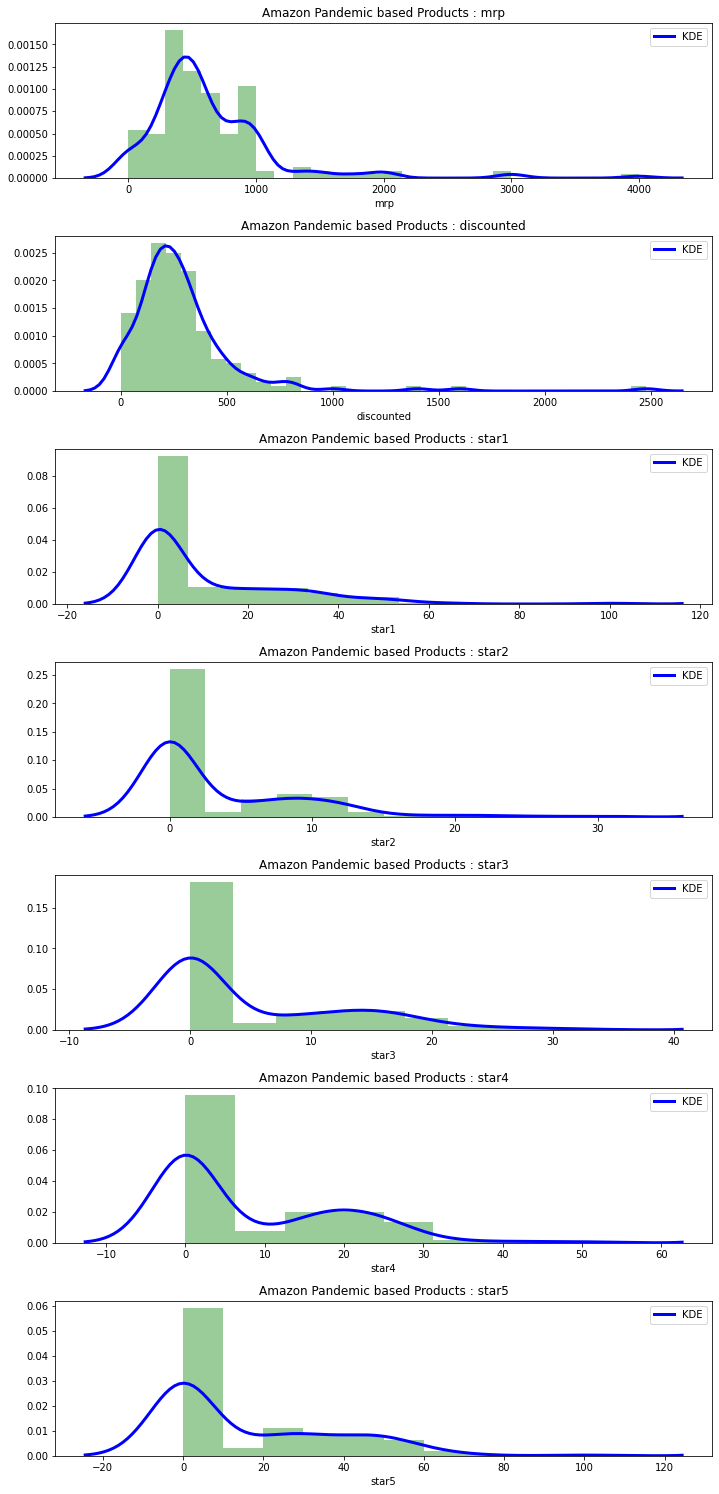

In [ ]:
plt.figure(figsize=(10,50))
for i in range(7):
  plt.subplot(17, 1, i+1)
  sns.distplot(amz_pan[amz_pan.columns[i+4]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(str('Amazon Pandemic based Products : ')+amz_pan.columns[i+4])

plt.tight_layout()

### **Amazon medical equipment**

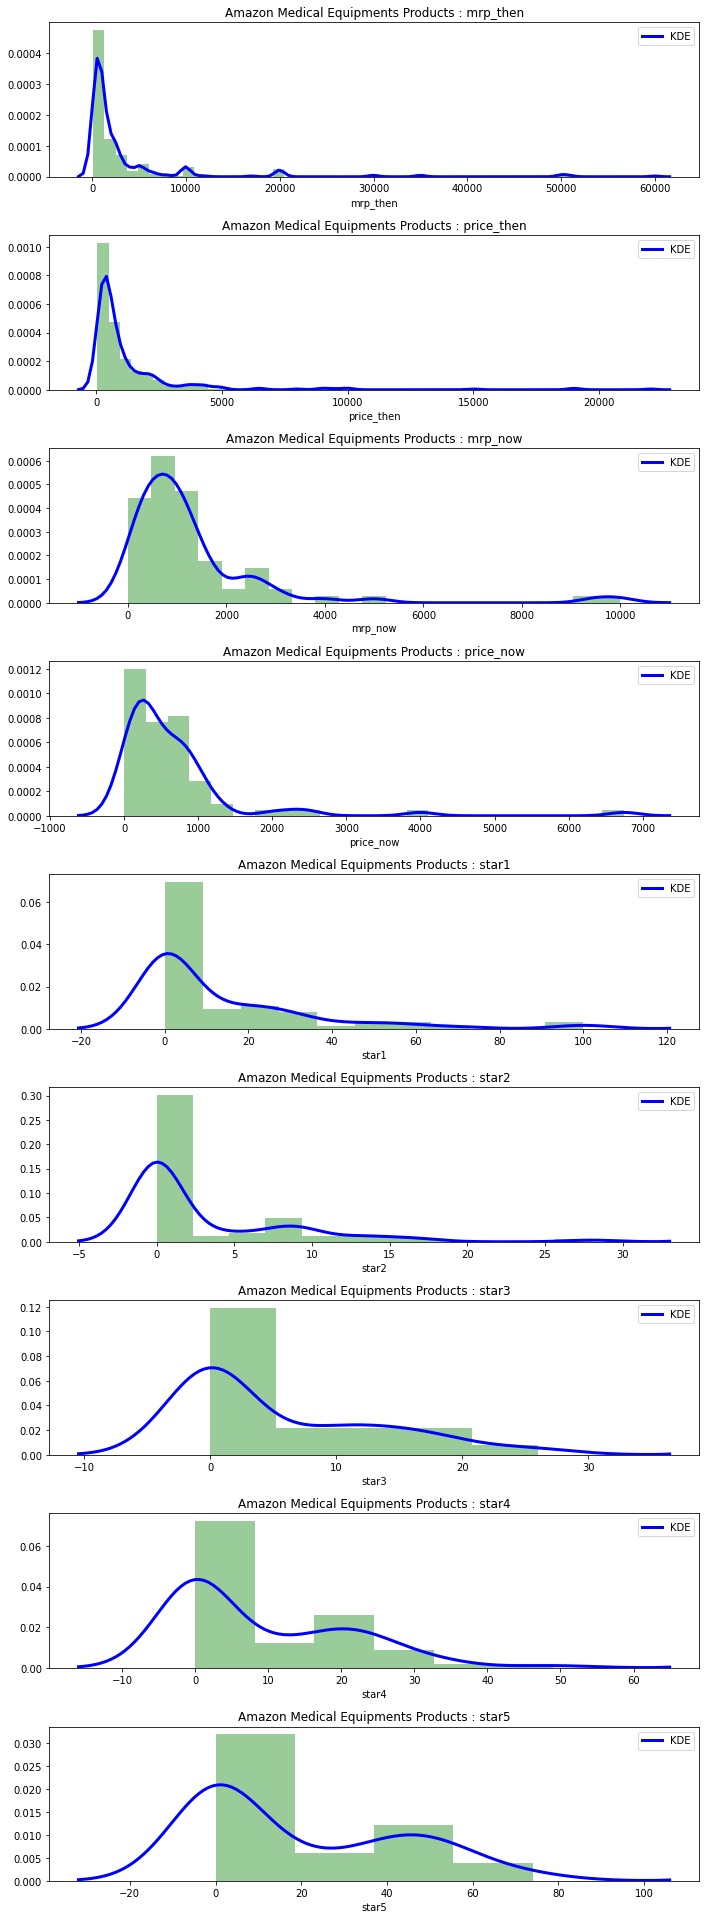

In [ ]:
indexes=[5,6,12,13,14,15,16,17,18]
plt.figure(figsize=(10,50))
c=0
for i in indexes:
  plt.subplot(17, 1, c+1)
  sns.distplot(amz_med3[amz_med3.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(str('Amazon Medical Equipments Products : ')+amz_med3.columns[i])
  c=c+1

plt.tight_layout()

### **Amazon Sanitary Products**

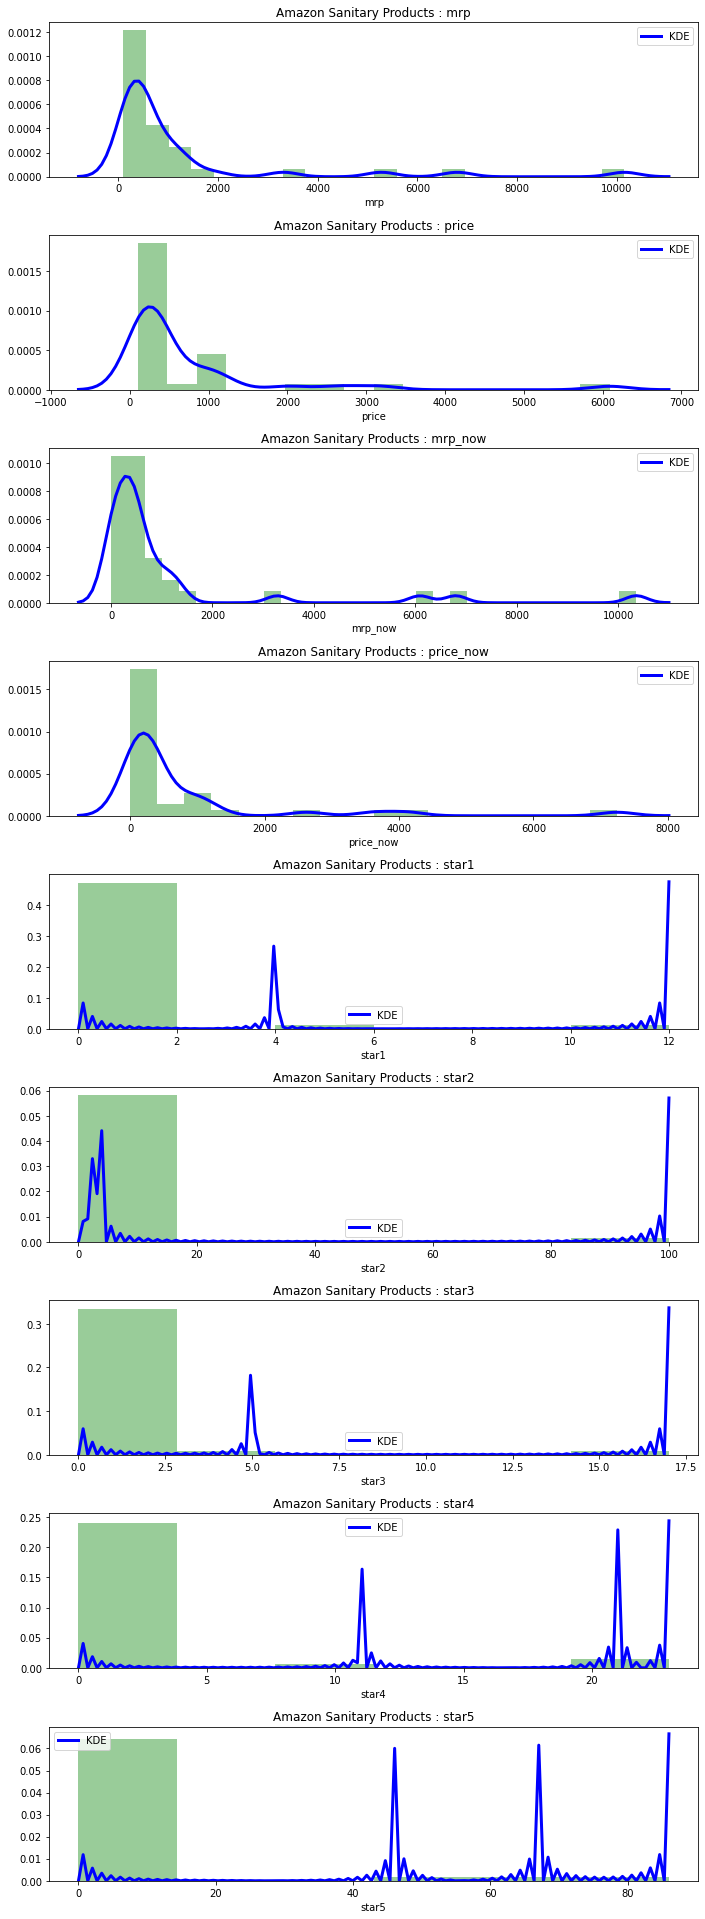

In [ ]:
indexes=[3,4,6,7,8,9,10,11,12]
plt.figure(figsize=(10,50))
c=0
for i in indexes:
  plt.subplot(17, 1, c+1)
  sns.distplot(amz_san[amz_san.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(str('Amazon Sanitary Products : ')+amz_san.columns[i])
  c=c+1

plt.tight_layout()

### **Flipkart Pandemic Based Products**

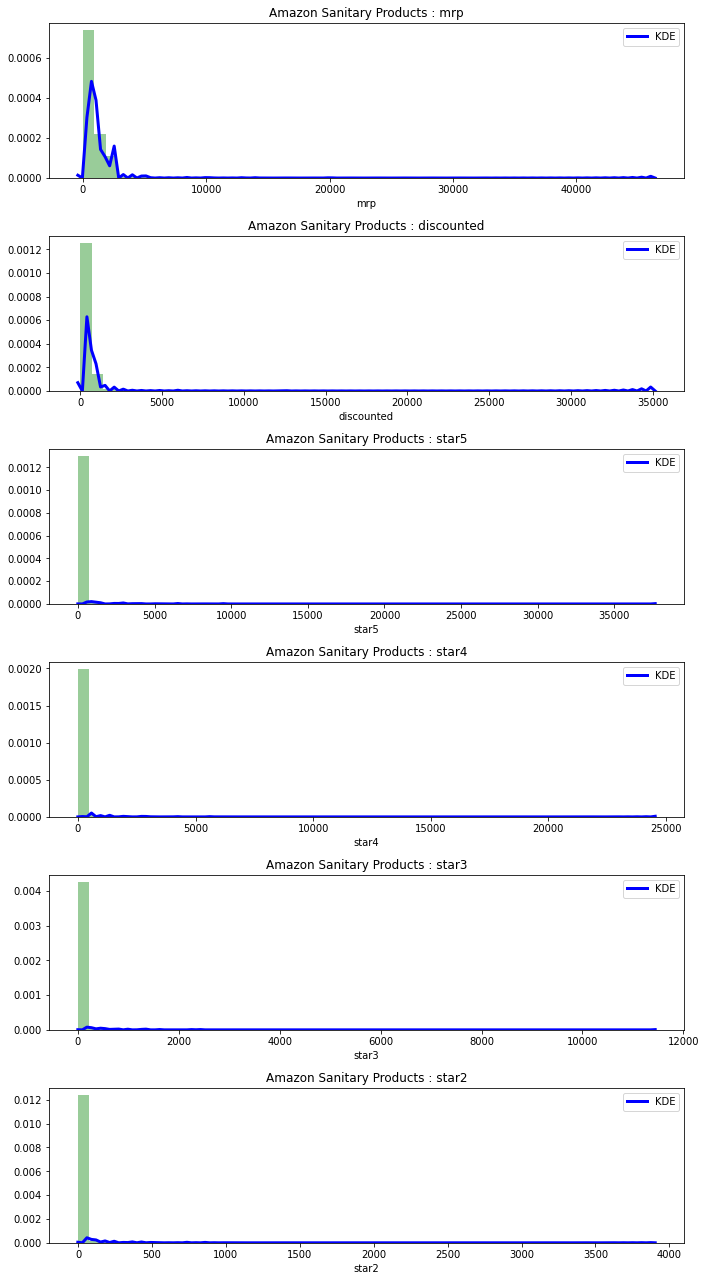

In [ ]:
plt.figure(figsize=(10,50))
c=0
for i in range(3,9):
  plt.subplot(17, 1, c+1)
  sns.distplot(flip_pan[flip_pan.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(str('Amazon Sanitary Products : ')+flip_pan.columns[i])
  c=c+1

plt.tight_layout()

# **Clustering**

## **Amazon**

### **K detection using Elbow Method**

In [ ]:
amz_san=amz_san.drop(['crawl_timestamp','product_asin'], axis = 1) 
amz_san.rename(columns = {'category':'product'}, inplace = True) 
amz_san.rename(columns = {'product_title':'name'}, inplace = True) 
amz_san.rename(columns = {'mrp':'mrp_then'}, inplace = True) 
amz_san.rename(columns = {'price':'price_then'}, inplace = True) 
amz_pan=amz_pan.drop(['url','id'], axis = 1) 
amz_pan.rename(columns = {'mrp':'mrp_now'}, inplace = True) 
amz_pan.rename(columns = {'discounted':'price_now'}, inplace = True)
amz_pan['mrp_then']=['nill'  for i in amz_pan['name']]
amz_pan['price_then']=['nill'  for i in amz_pan['name']]
amz_med3=amz_med3.drop(['asin','product_url','brand_name','image_url','discount_percentage','product_description', 'date_first_available','number_of_reviews', 'seller_name' ], axis = 1)
amz_med3.rename(columns = {'product_name':'name'}, inplace = True)
amz_med3['product']=['medical equipment' for i in amz_med3['name']]



In [ ]:
print(amz_san.columns)
print(amz_pan.columns)
print(amz_med3.columns)

Index(['product', 'name', 'mrp_then', 'price_then', 'mrp_now', 'price_now',
       'star1', 'star2', 'star3', 'star4', 'star5'],
      dtype='object')
Index(['product', 'name', 'mrp_now', 'price_now', 'star1', 'star2', 'star3',
       'star4', 'star5', 'mrp_then', 'price_then'],
      dtype='object')
Index(['name', 'mrp_then', 'price_then', 'mrp_now', 'price_now', 'star1',
       'star2', 'star3', 'star4', 'star5', 'product'],
      dtype='object')


In [ ]:
print(amz_pan.shape)
print(amz_san.shape)
print(amz_med3.shape)

(169, 11)
(37, 11)
(531, 11)


In [ ]:
amz_all=pd.concat([amz_pan,amz_san,amz_med3])
amz_all=amz_all.reset_index()

In [ ]:
amz_all['mrp_then']=[np.nan if i=='nill' else float(i) for i in amz_all['mrp_then']]
amz_all['price_then']=[np.nan if i=='nill' else float(i) for i in amz_all['price_then']]
amz_all['star5']=[float(i) for i in amz_all['star5'] ]
amz_all['star4']=[float(i) for i in amz_all['star4'] ]
amz_all['star3']=[float(i) for i in amz_all['star3'] ]
amz_all['star2']=[float(i) for i in amz_all['star2'] ]
amz_all['star1']=[float(i) for i in amz_all['star5'] ]
amz_all['mrp_now']=[float(i) for i in amz_all['mrp_now'] ]
amz_all['price_now']=[float(i) for i in amz_all['price_now'] ]

In [ ]:
amz_all

,index,product,name,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
0,0,facemasks,SURGICOMFORT Non Woven Elastic Ear-Loop Dispos...,1000.0,151.0,24.0,9.0,13.0,14.0,24.0,NaN,NaN
1,1,facemasks,Mediweave Reusable 100% Cotton Cloth Face Mask...,499.0,324.0,27.0,12.0,15.0,17.0,27.0,NaN,NaN
2,2,facemasks,RSM 3 Layer Non-Woven Disposable Medical Face ...,349.0,249.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,3,facemasks,Steelbird SBA-2 7Wings Unisex Helmet Visor Fac...,898.0,799.0,61.0,3.0,6.0,25.0,61.0,NaN,NaN
4,4,facemasks,Vocado 5 Layer Filter Protection Face Mask Kn9...,399.0,121.0,19.0,11.0,14.0,16.0,19.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
732,526,medical equipment,Mra Fashion N95 / PM 2.5 Anti Pollution Mask |...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,527,medical equipment,SG HEALTH N95 Kids pollution dust mask Pink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,528,medical equipment,TrendzOn Anti-Virus 3Ply Disposable Face Masks...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,529,medical equipment,Aptechdeals 5Pcs SURGICAL MASK with Ear Loop 3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.0,199.0


facemasks
(149, 9)
[[ 0.00000000e+00  0.00000000e+00 -5.70919272e-01 ...  9.59335492e-01
   9.09625988e-01  3.00284899e-01]
 [ 0.00000000e+00  0.00000000e+00  4.34999120e-01 ...  1.21758479e+00
   1.43158082e+00  4.37251583e-01]
 [ 0.00000000e+00  0.00000000e+00 -1.09266846e-03 ... -7.19284967e-01
  -6.56238518e-01 -7.95448570e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00 -2.91820527e-01 ... -7.19284967e-01
  -6.56238518e-01  3.77010755e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.13978145e-01 ...  2.89620525e+00
  -6.56238518e-01 -7.95448570e-01]
 [ 0.00000000e+00  0.00000000e+00 -1.44891740e+00 ...  1.73408340e+00
   1.25759588e+00  2.63515320e-02]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.



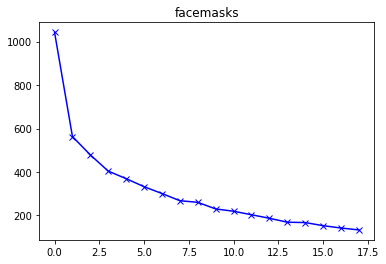

ppe
(16, 9)
[[ 0.          0.         -0.57115876 -0.59257231  2.27212025  2.90693866
   3.04243492  3.13681215  2.27212025]
 [ 0.          0.         -0.49484157  0.81752296 -0.37501014 -0.37619206
  -0.37363236 -0.37102079 -0.37501014]
 [ 0.          0.         -0.22329435 -0.33944865 -0.37501014 -0.37619206
  -0.37363236 -0.37102079 -0.37501014]
 [ 0.          0.         -0.37415392 -0.58216997 -0.37501014 -0.37619206
  -0.37363236 -0.37102079 -0.37501014]
 [ 0.          0.         -0.78946143  0.81752296 -0.37501014 -0.37619206
  -0.37363236 -0.37102079 -0.37501014]
 [ 0.          0.          1.46278319  0.5863598  -0.37501014 -0.37619206
  -0.37363236 -0.37102079 -0.37501014]
 [ 0.          0.         -0.5072653  -0.33944865 -0.37501014 -0.37619206
  -0.37363236 -0.37102079 -0.37501014]
 [ 0.          0.         -0.13455342 -0.45503023 -0.37501014 -0.37619206
  -0.37363236 -0.37102079 -0.37501014]
 [ 0.          0.         -0.31203527 -0.68619339 -0.37501014 -0.37619206
  -0.37363

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.



ppe : (<class 'ValueError'>, ValueError('n_samples=16 should be >= n_clusters=17',), <traceback object at 0x7f983decde08>)
ppekits
(3, 9)
[[ 0.          0.         -0.07574055 -0.33816044  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          1.26085741  1.35829662  0.          0.
   0.          0.          0.        ]
 [ 0.          0.         -1.18511686 -1.02013618  0.          0.
   0.          0.          0.        ]]
ppekits : (<class 'ValueError'>, ValueError('n_samples=3 should be >= n_clusters=4',), <traceback object at 0x7f983decde88>)
handwash
(1, 9)
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
handwash : (<class 'ValueError'>, ValueError('n_samples=1 should be >= n_clusters=2',), <traceback object at 0x7f983decdf88>)
Bath & Shower
(11, 9)
[[-0.61240778 -0.55729485 -0.6008245  -0.56497135  0.          0.
   0.          0.          0.        ]
 [-0.55142053 -0.63201218 -0.65315927 -0.50741726  0.          0.
   0.          0.          0.        ]
 [-0.59708435 -0

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.



Bath & Shower : (<class 'ValueError'>, ValueError('n_samples=11 should be >= n_clusters=12',), <traceback object at 0x7f983dc90108>)
Skin Care
(25, 9)
[[ 0.12418396 -0.13028525  0.06139634  0.3144503  -0.35717038 -0.35318871
  -0.25633436 -0.2230331  -0.35717038]
 [-0.54919077 -0.47494678 -0.68455797 -0.39613694 -0.35717038 -0.35318871
  -0.25633436 -0.2230331  -0.35717038]
 [-0.09539475 -0.41941798 -0.2564288   0.08273707 -0.35717038 -0.35318871
  -0.25633436 -0.2230331  -0.35717038]
 [ 0.          0.         -0.21903761 -0.257109   -0.35717038 -0.35318871
  -0.25633436 -0.2230331  -0.35717038]
 [ 0.78292012 -0.30261602 -0.68455797  1.00958999 -0.35717038 -0.35318871
  -0.25633436 -0.2230331  -0.35717038]
 [ 0.78145626  1.05496746  1.18313214  1.00804523 -0.35717038 -0.35318871
  -0.25633436 -0.2230331  -0.35717038]
 [ 3.87605234  4.21627962  4.22116659  4.2226801  -0.35717038 -0.35318871
  -0.25633436 -0.2230331  -0.35717038]
 [-0.6077451  -0.62812969 -0.46021081 -0.45792713 -0.35717

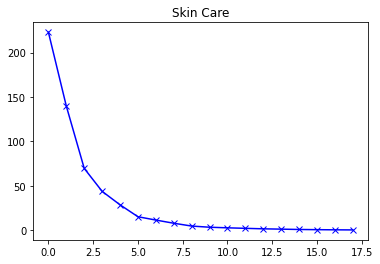

Grocery & Gourmet Foods
(1, 9)
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Grocery & Gourmet Foods : (<class 'ValueError'>, ValueError('n_samples=1 should be >= n_clusters=2',), <traceback object at 0x7f983de4fd88>)
medical equipment
(531, 9)
[[-0.42537784 -0.50936436 -0.53616383 ... -0.71797762 -0.56120898
  -0.83552093]
 [-0.33790761 -0.43443814 -0.37758757 ... -0.71797762 -0.56120898
  -0.83552093]
 [-0.4316168  -0.47978822 -0.59938705 ... -0.71797762 -0.56120898
  -0.83552093]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.400422   -0.45454991  0.         ...  0.          0.
   0.        ]
 [-0.41289992 -0.44429685  0.         ...  0.          0.
   0.        ]]


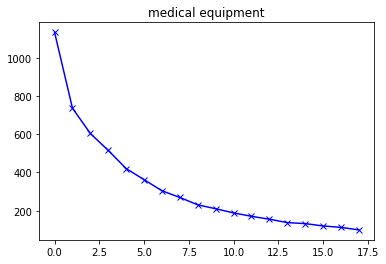

In [ ]:
scaler = StandardScaler()
valid_ones_amz=[]
for i in list(amz_all['product'].unique()):
  print(i)
  df_scaled = scaler.fit_transform(amz_all[['mrp_then','price_then','price_now','mrp_now','star5',"star4",'star3','star2','star1']][amz_all['product']==i])
  print(df_scaled.shape)
  df_scaled=np.nan_to_num(df_scaled)
  print(df_scaled)
  
  scores = []
  try:
    for j in range(1,19):
        kmeans = KMeans(n_clusters=j)
        kmeans.fit(df_scaled)
        scores.append(kmeans.inertia_)
    plt.title(i)
    plt.plot(scores, 'bx-')
    plt.show()
    valid_ones_amz.append(i)
  except:
    print(i+' : '+str(sys.exc_info()))

### **Counts in Clusters**

facemasks
(149, 9)
facemasks : (7, 9)
   mrp_then  price_then  price_now  ...     star3     star2     star1
0       0.0         0.0  -0.162468  ... -0.719285 -0.656239 -0.795449
1       0.0         0.0  -0.248211  ...  0.841949  0.158327  1.182267
2       0.0         0.0   1.356342  ... -0.531467 -0.498070 -0.704137
3       0.0         0.0   0.033795  ...  0.110802  2.922880  0.430729
4       0.0         0.0  -0.677907  ...  1.238245  0.958342  0.334983
5       0.0         0.0   0.241181  ... -0.568640 -0.250274  2.156944
6       0.0         0.0   1.890577  ...  0.959335  0.484329  1.365581

[7 rows x 9 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.



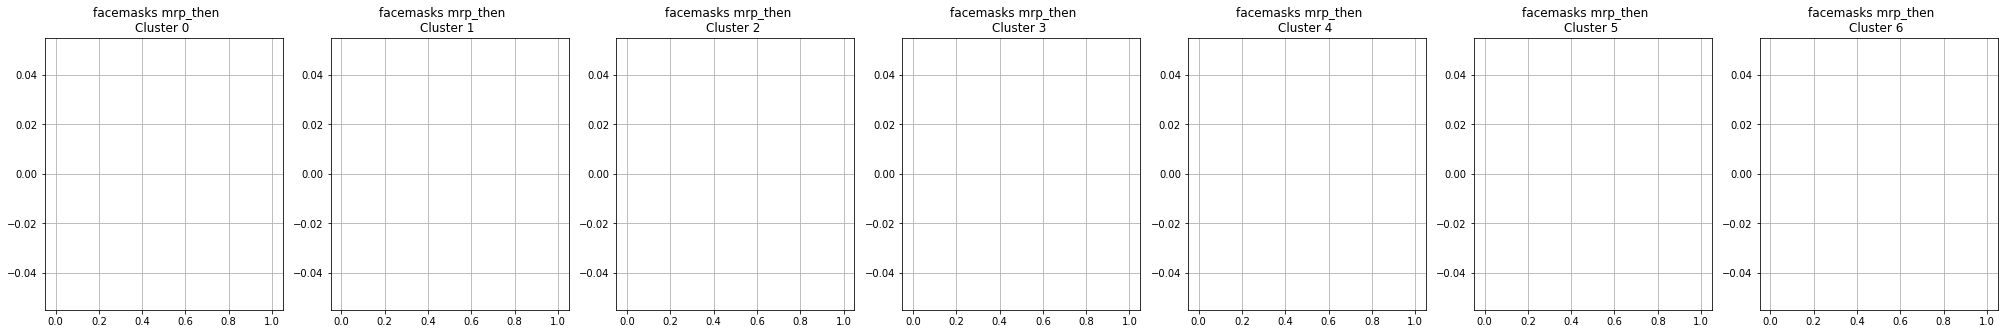

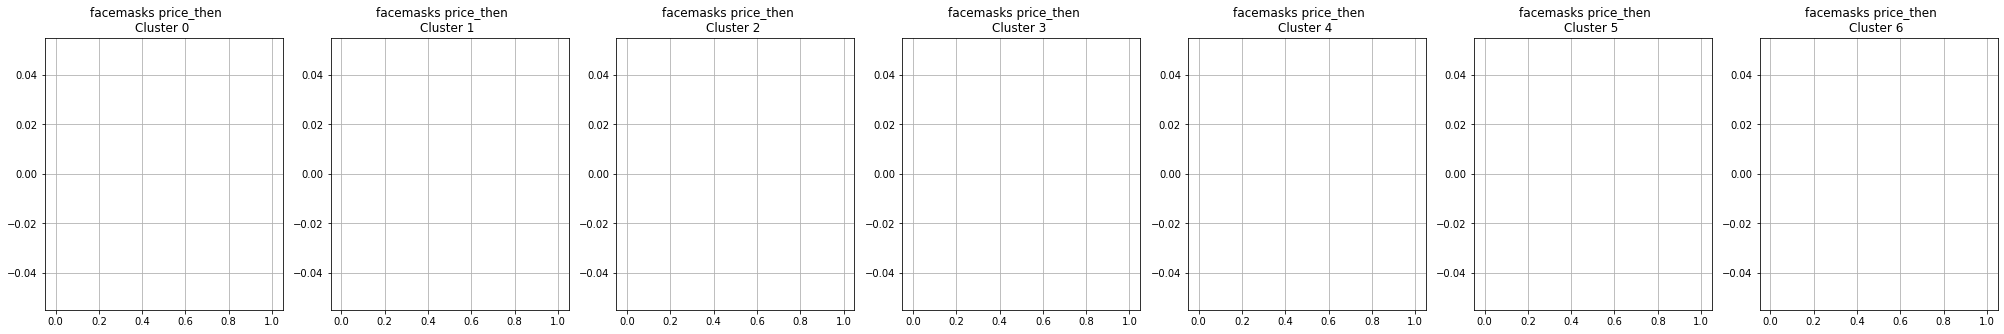

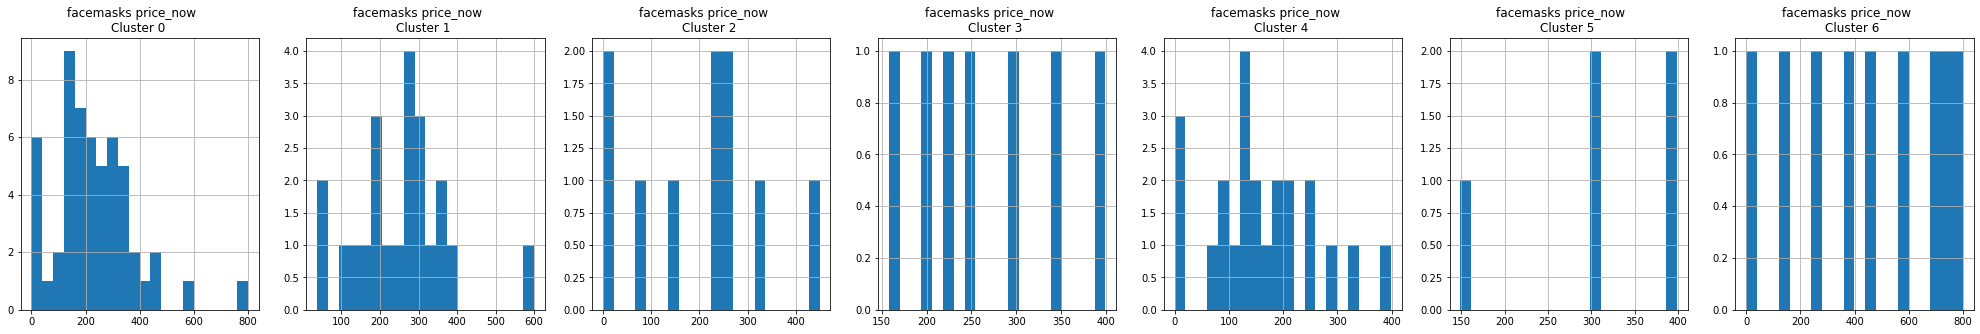

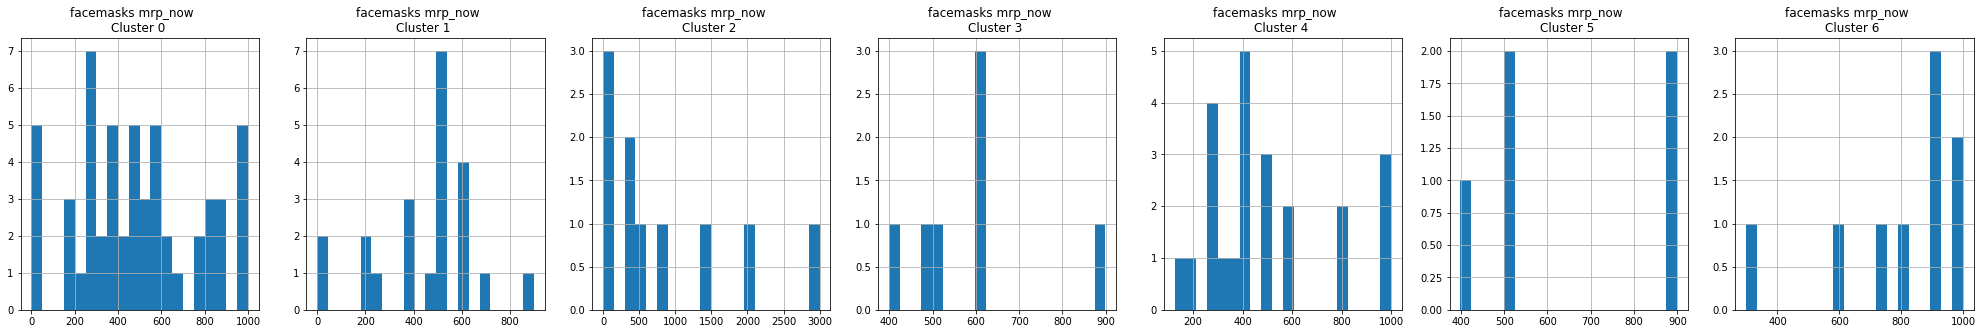

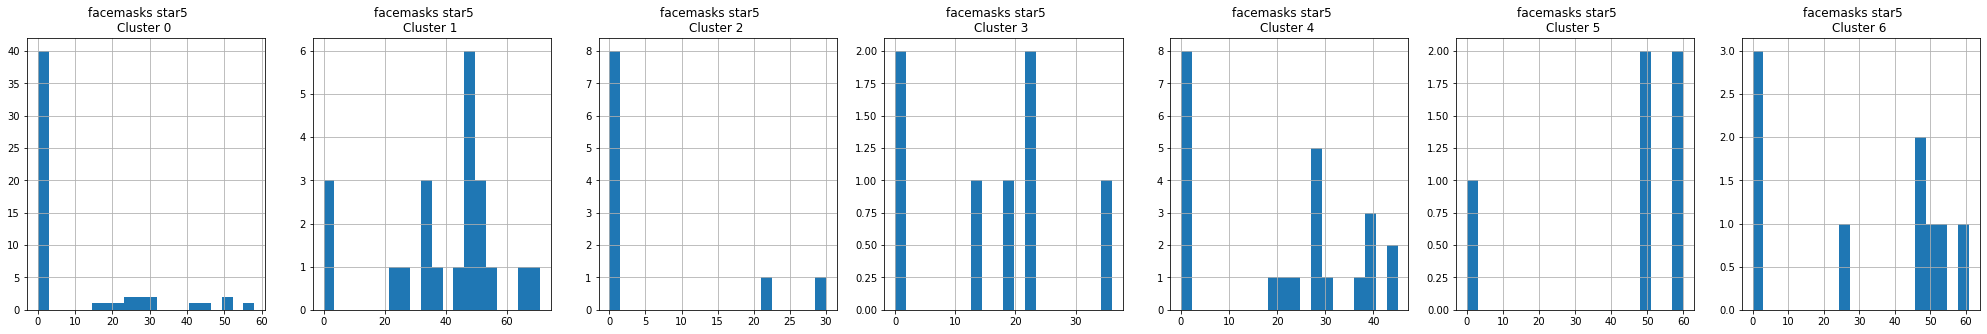

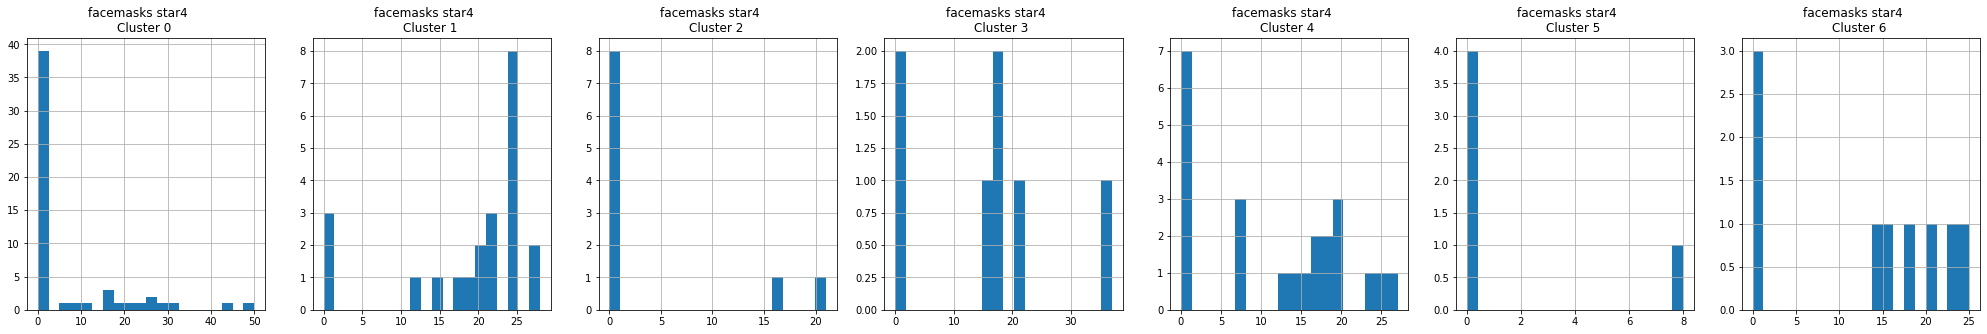

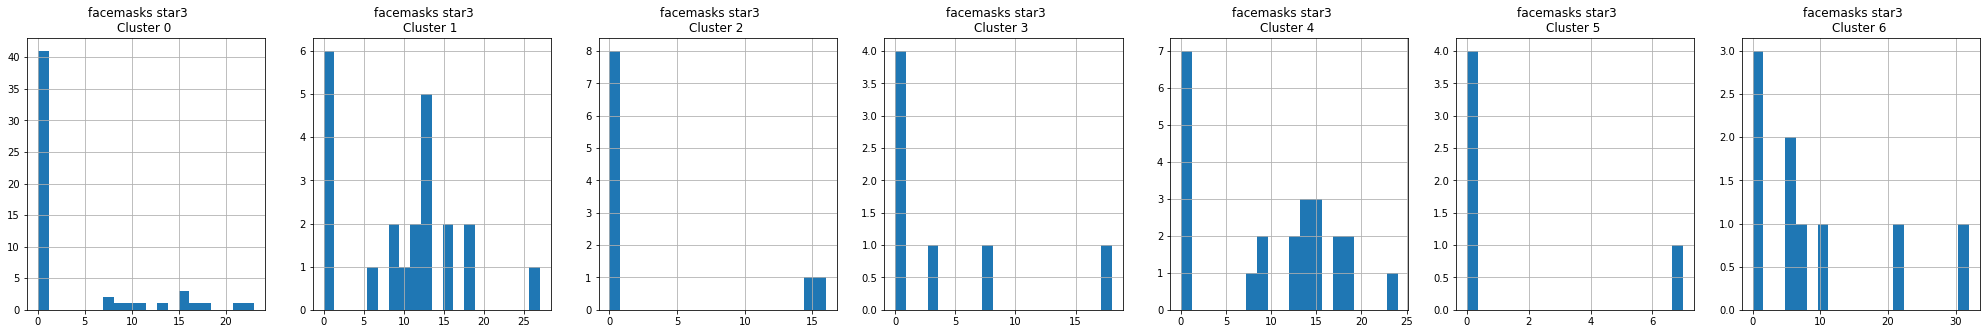

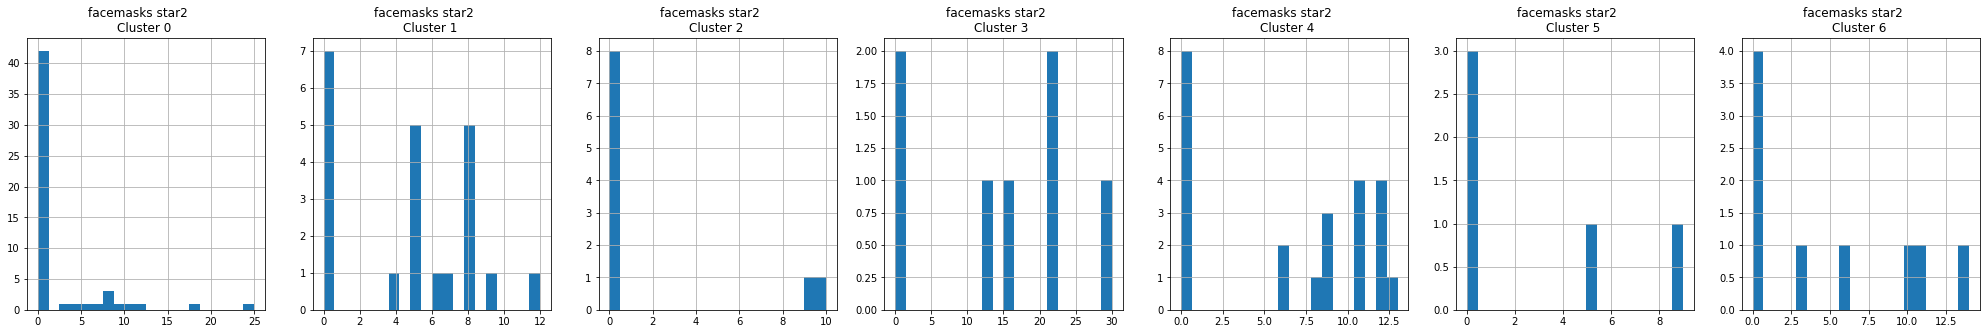

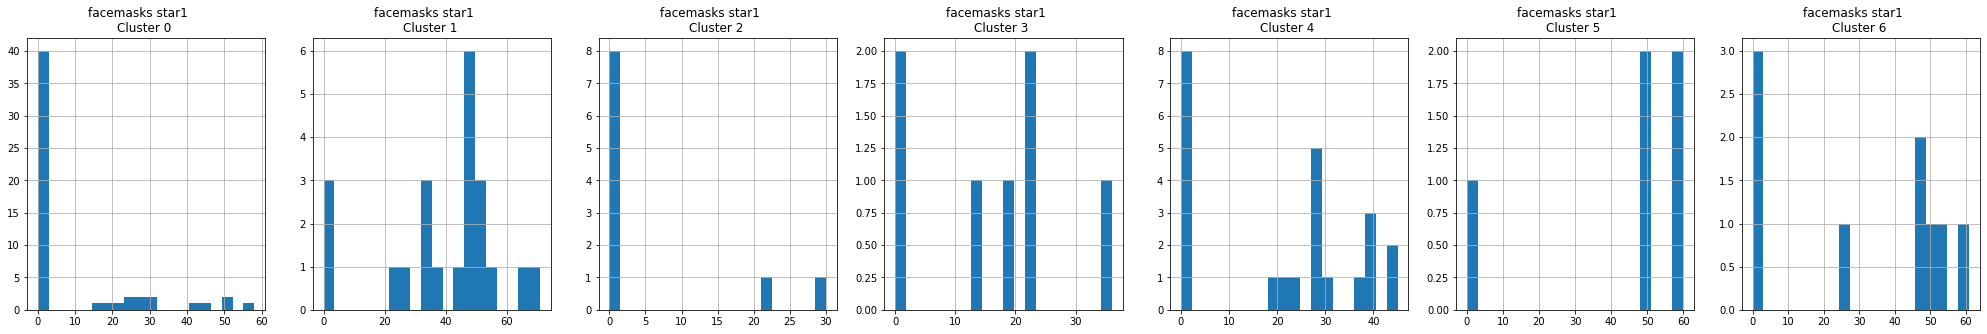

Skin Care
(25, 9)
Skin Care : (5, 9)
   mrp_then  price_then  price_now  ...     star3     star2     star1
0 -0.100286   -0.141004  -0.132851  ... -0.256334 -0.223033 -0.357170
1  3.876052    4.216280   4.221167  ... -0.256334 -0.223033 -0.357170
2 -0.536016   -0.448140  -0.275124  ...  0.471888 -0.095147  3.075434
3 -0.102714   -0.005824  -0.684558  ...  4.695579 -0.018416  1.706880
4 -0.695577   -0.494095  -0.329342  ... -0.256334  4.892405 -0.357170

[5 rows x 9 columns]


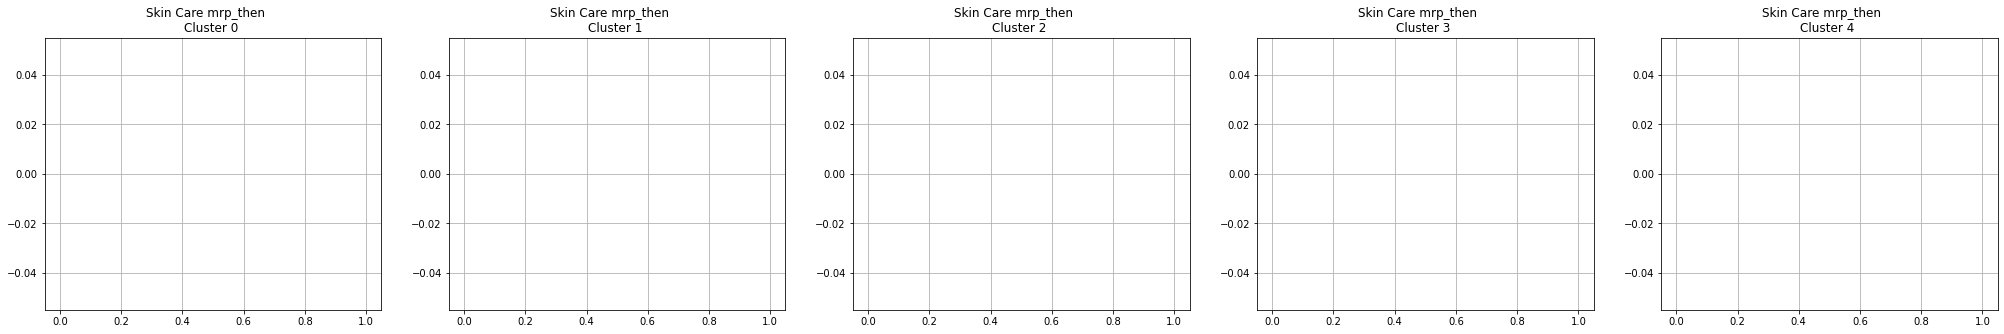

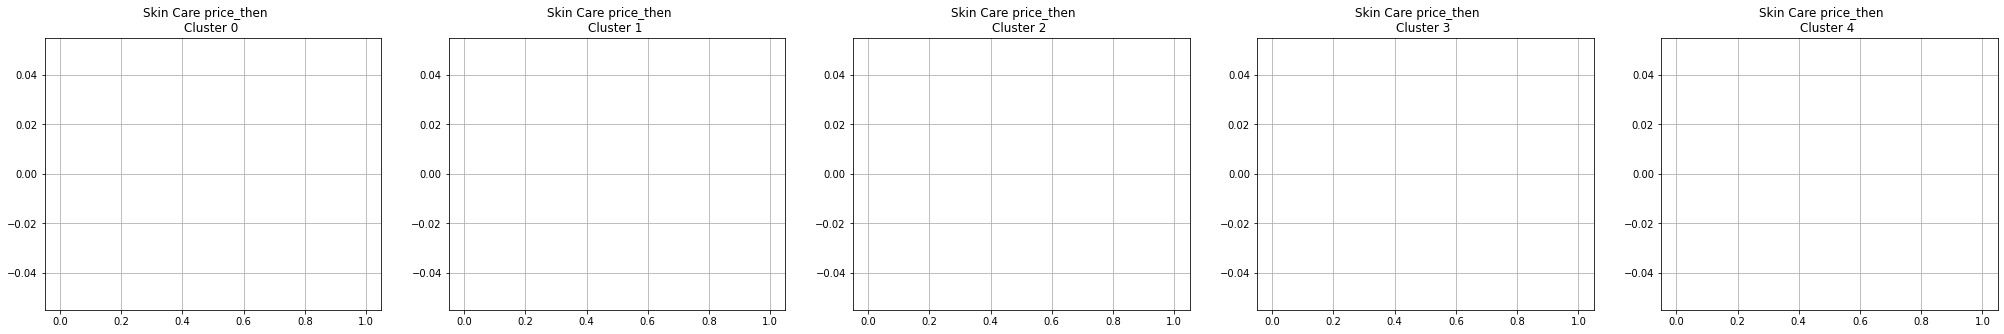

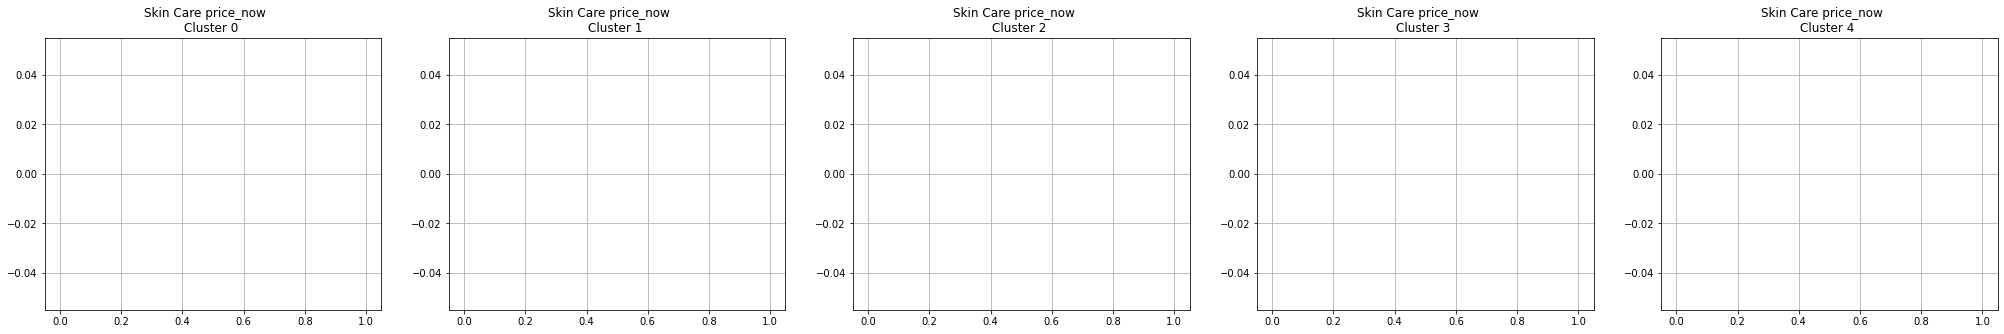

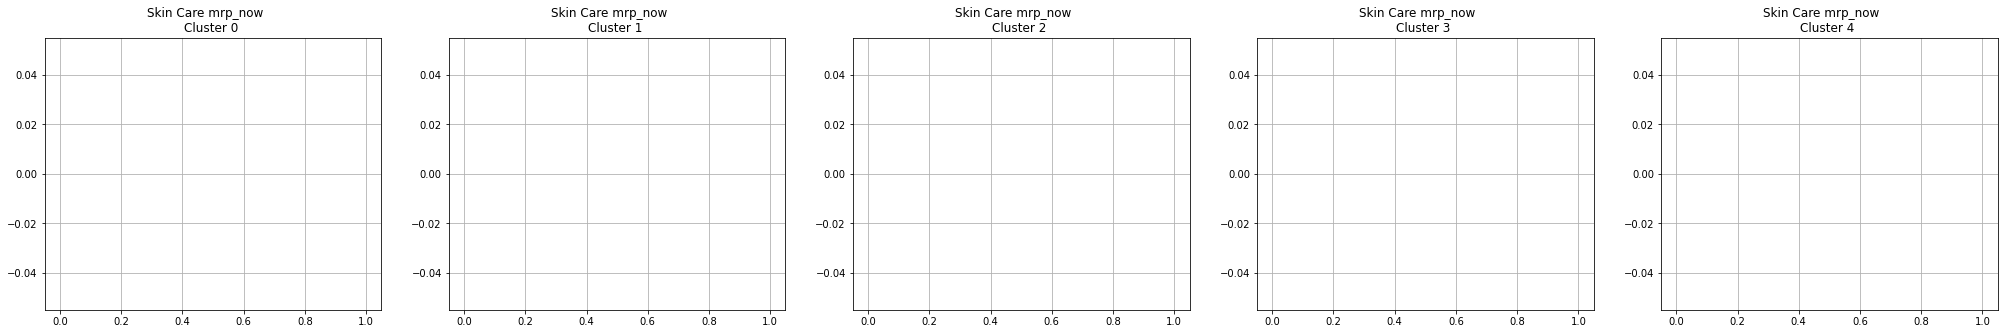

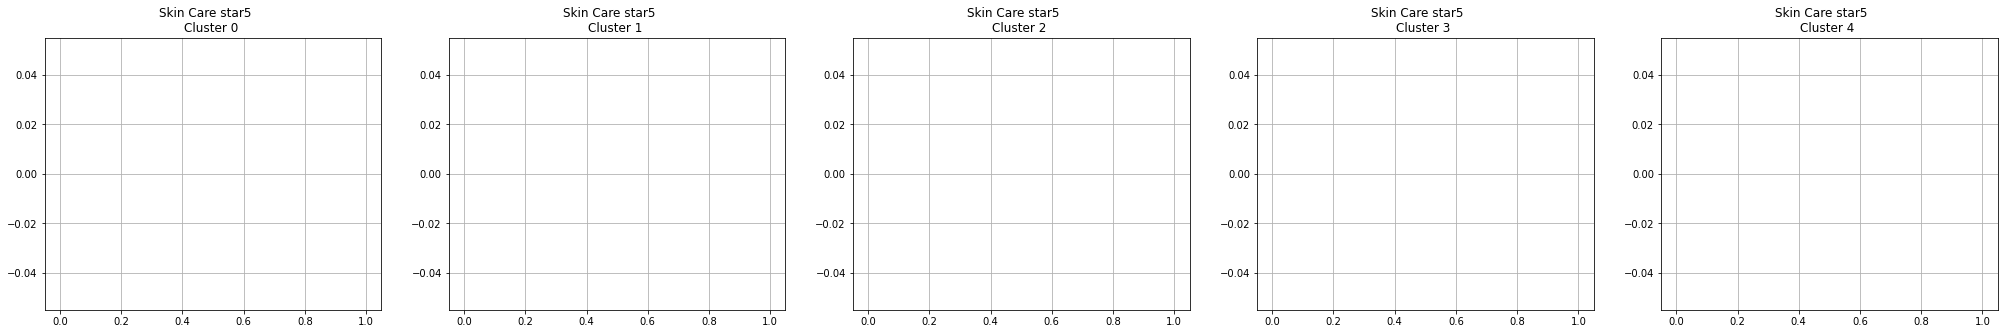

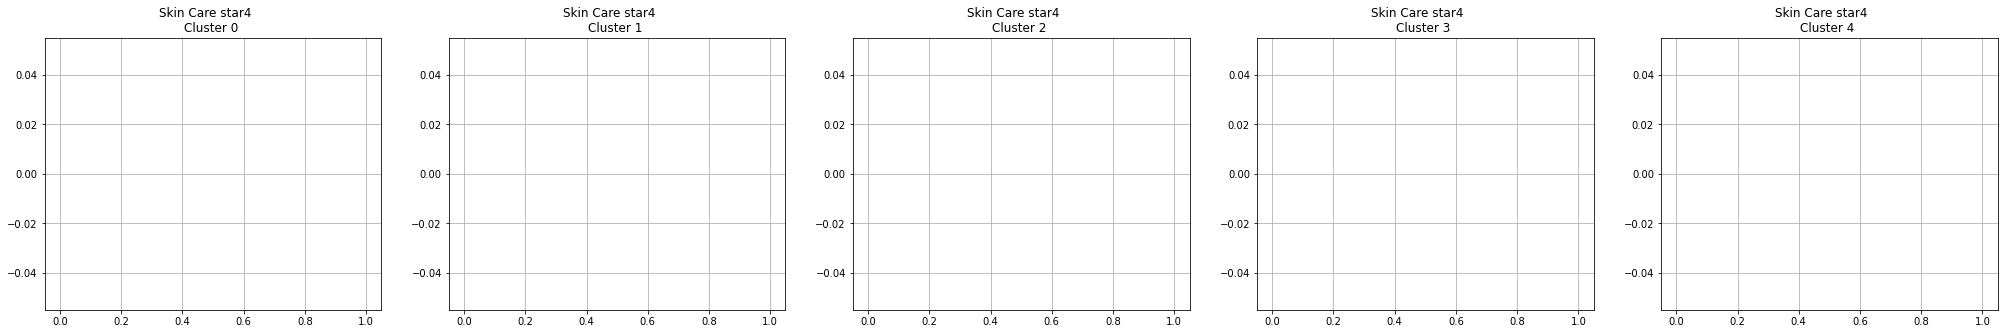

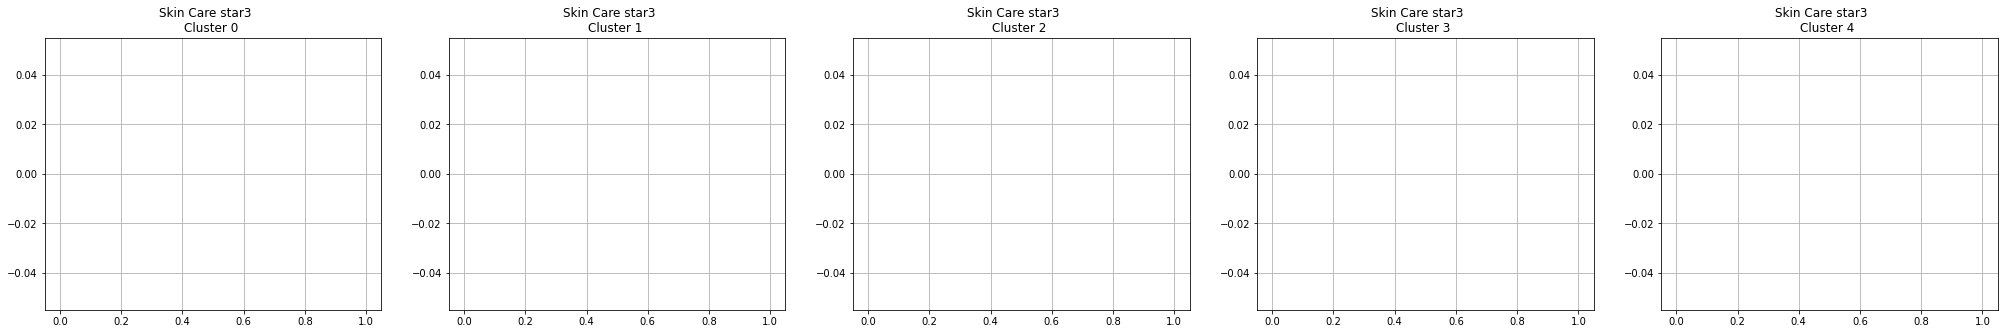

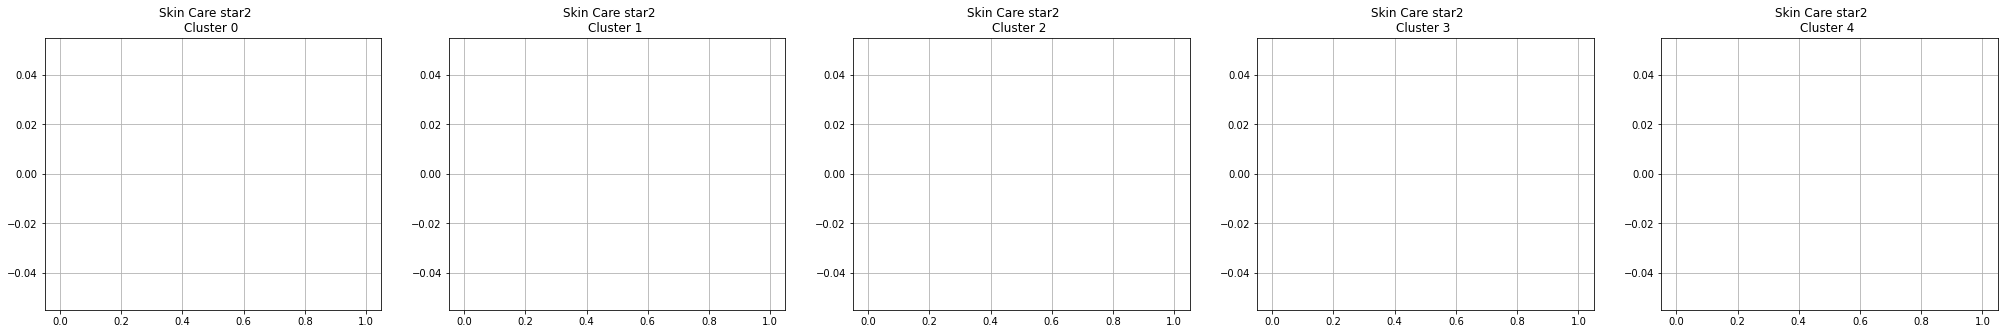

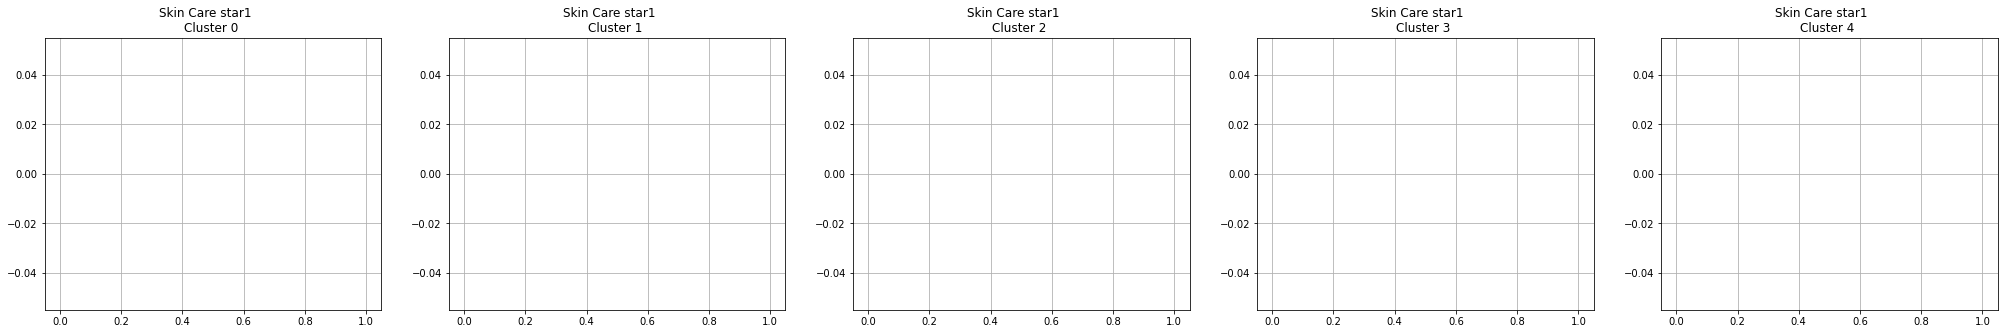

medical equipment
(531, 9)
medical equipment : (7, 9)
   mrp_then  price_then  price_now  ...     star3     star2     star1
0 -0.178898   -0.119800  -0.124376  ...  1.172272  1.755245  0.605672
1 -0.076434   -0.070519  -0.002724  ...  0.007669 -0.001694 -0.001580
2  2.842144    4.652376   0.269578  ... -0.102568 -0.080173 -0.119360
3  2.313588    5.086047   4.866830  ... -0.717978 -0.561209 -0.835521
4 -0.291034   -0.274078  -0.198740  ... -0.717978 -0.561209 -0.835521
5 -0.306178   -0.281709  -0.111969  ...  0.436616 -0.071552  1.319702
6  5.551646    1.016528   0.000000  ...  0.000000  0.000000  0.000000

[7 rows x 9 columns]


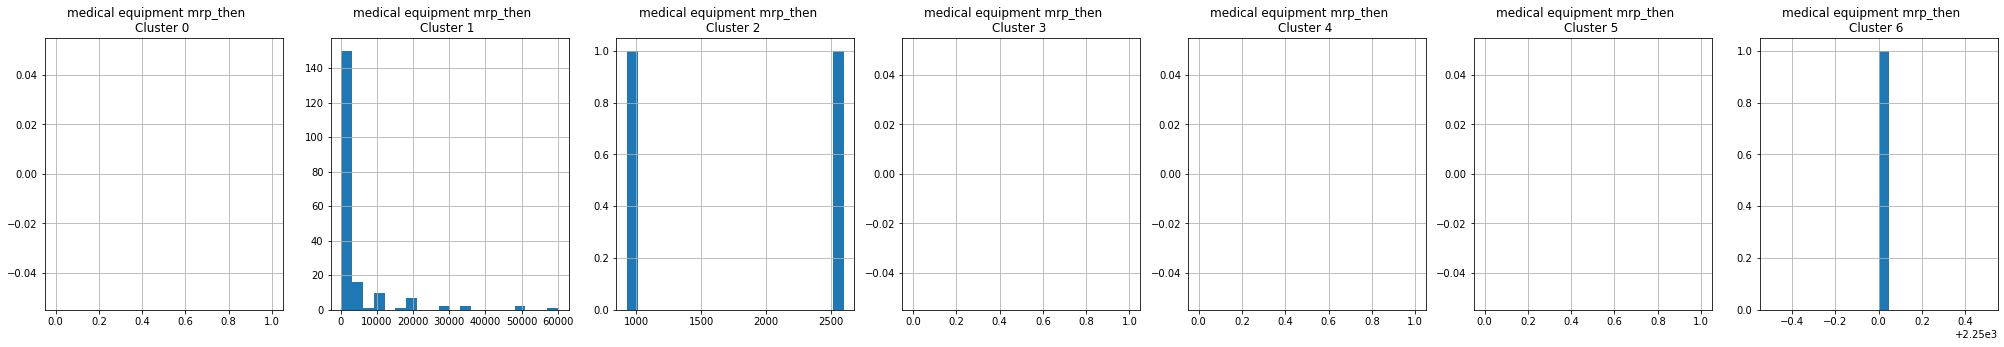

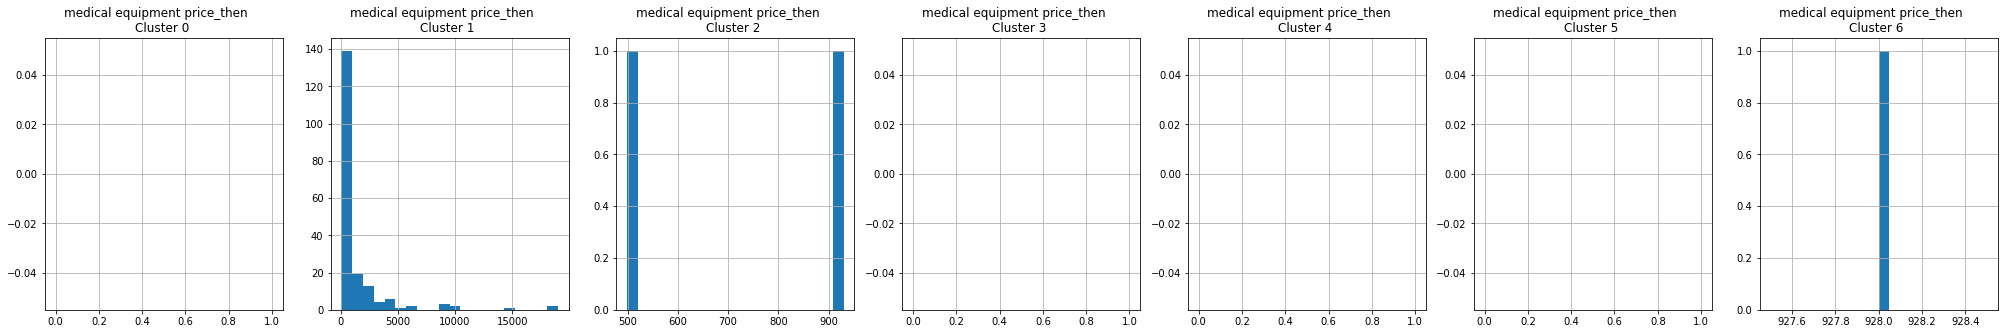

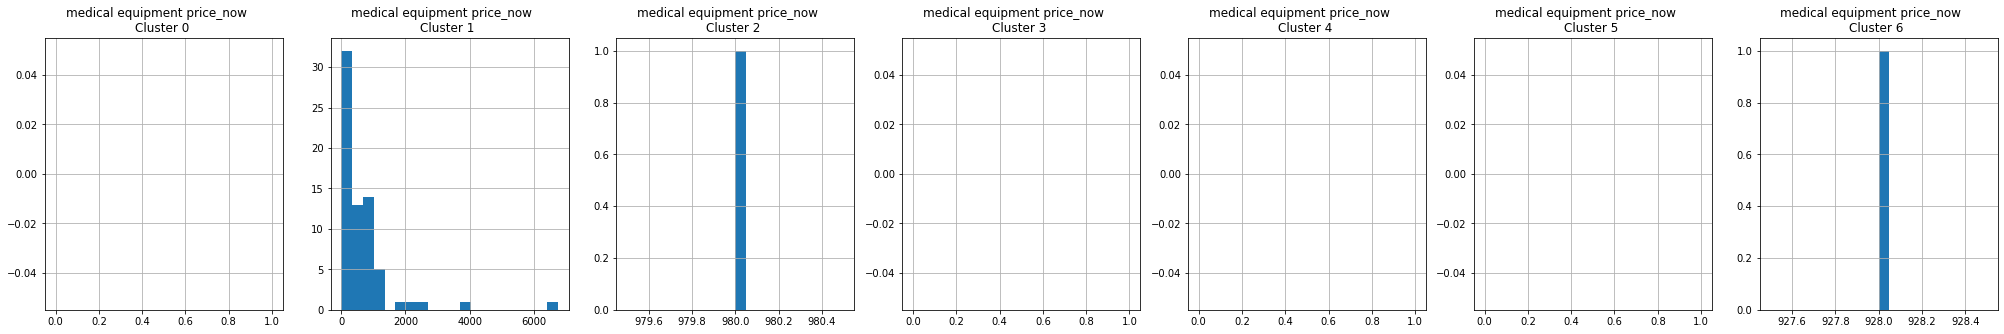

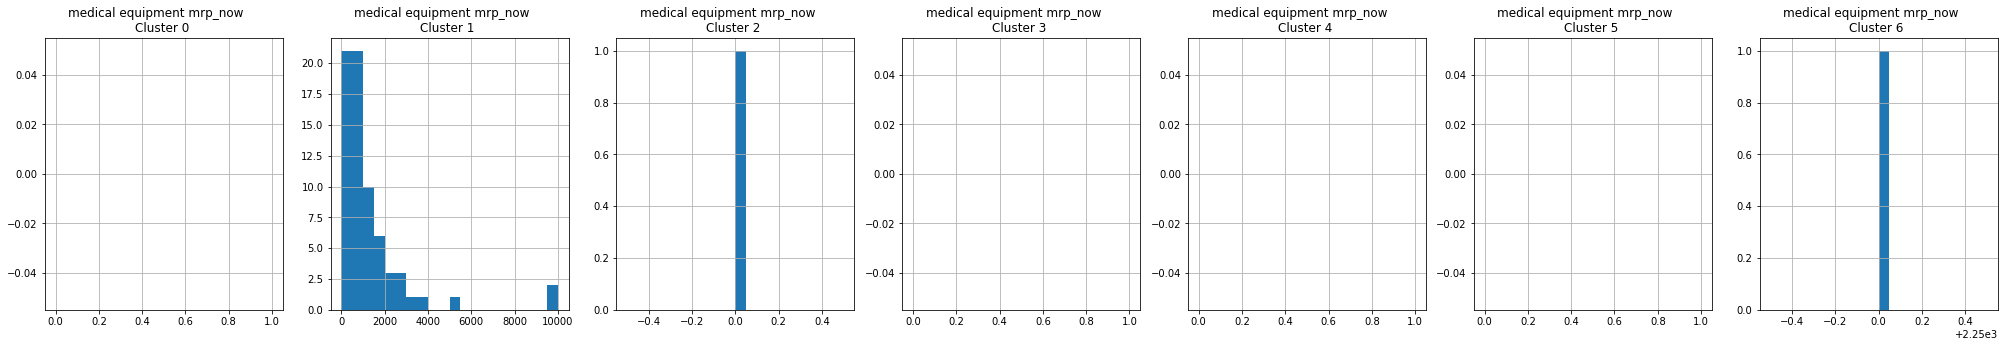

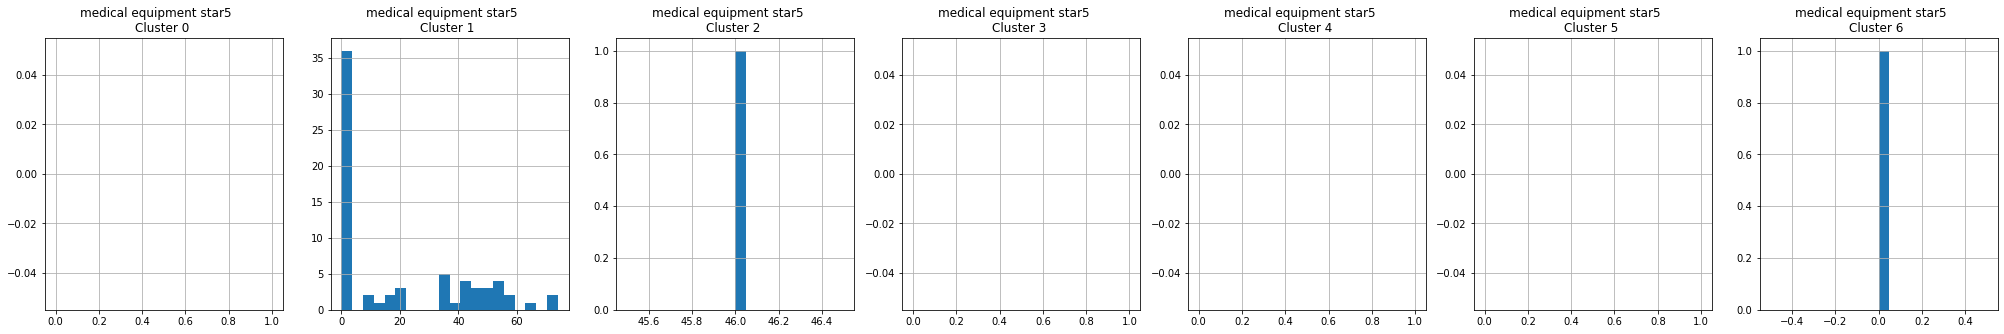

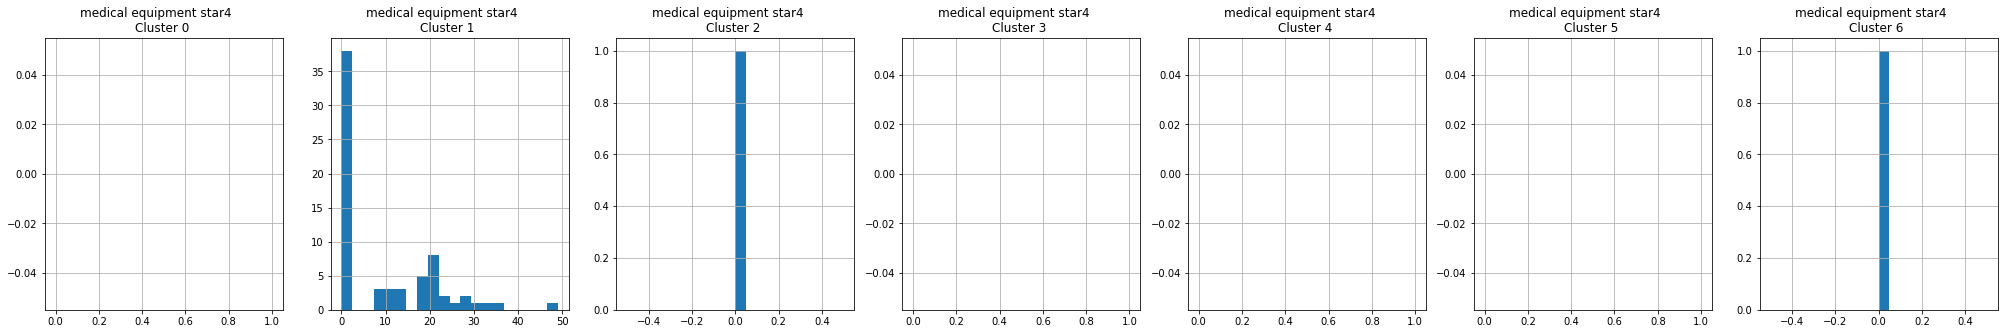

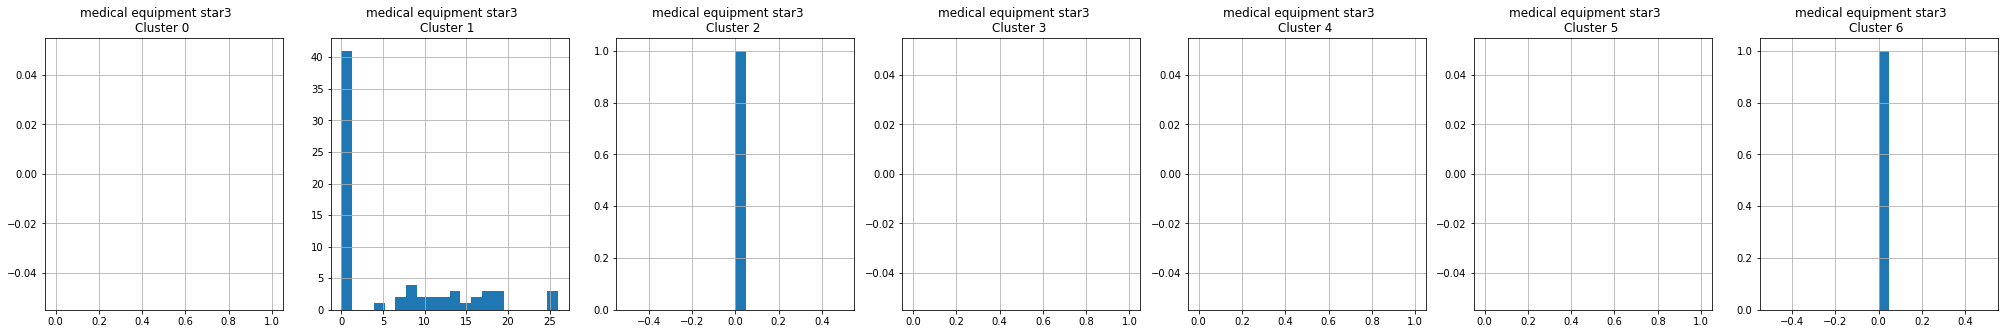

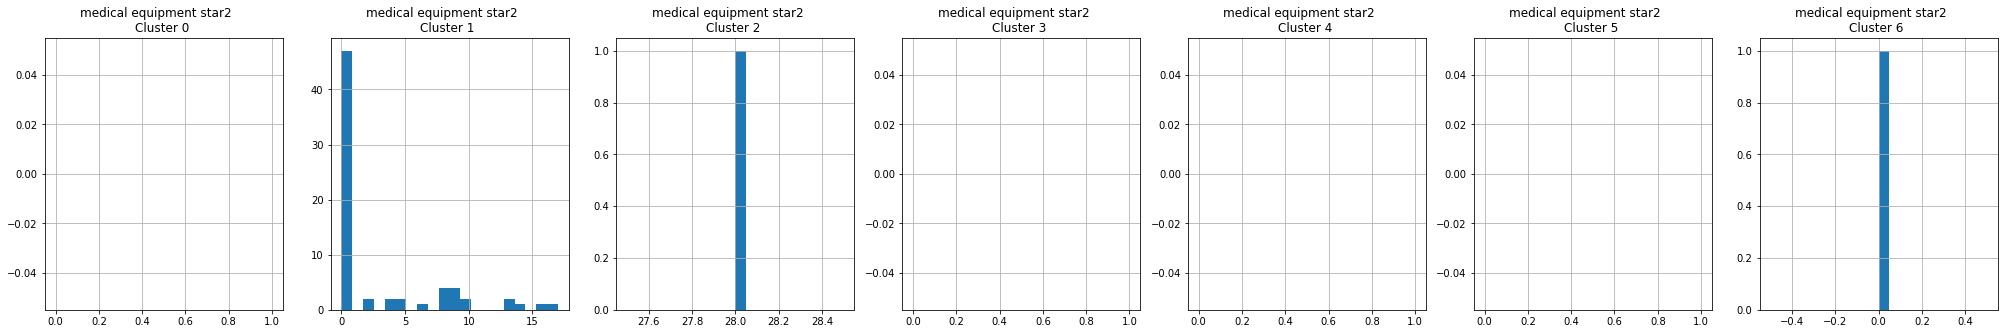

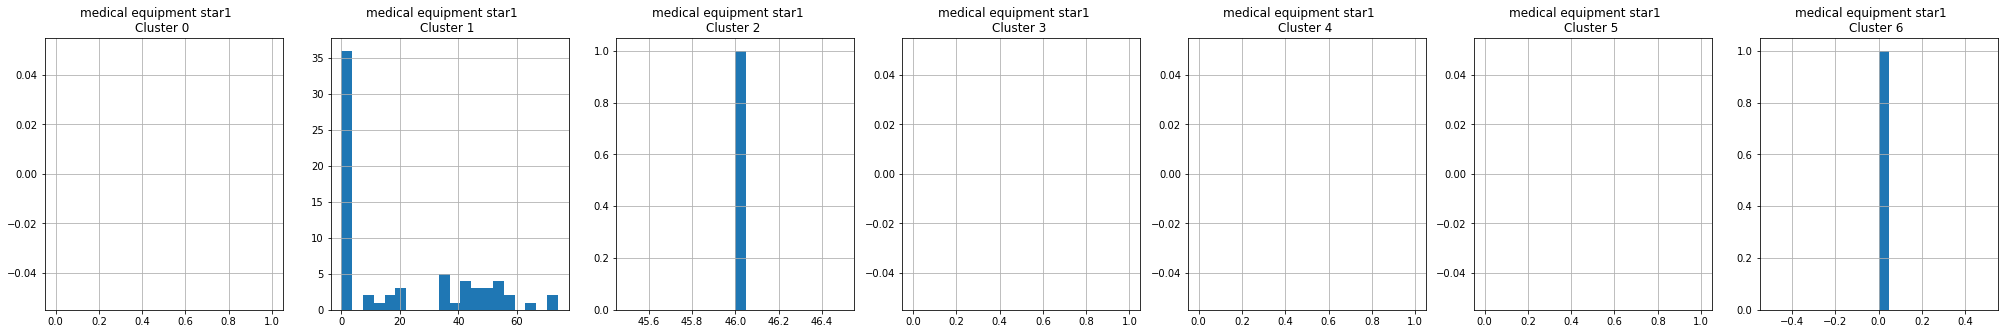

In [ ]:
columnsss_amz=['mrp_then','price_then','price_now','mrp_now','star5',"star4",'star3','star2','star1']
kmeans_dict_amz={'medical equipment':7,'Skin Care': 5, 'facemasks':7}
labels_dict_amz={}
for i in list(valid_ones_amz):
  print(i)
  df_scaled = scaler.fit_transform(amz_all[columnsss_amz][amz_all['product']==i])
  print(df_scaled.shape)
  df_scaled=np.nan_to_num(df_scaled)
  kmeans = KMeans(kmeans_dict_amz[i])
  kmeans.fit(df_scaled)
  labels = kmeans.labels_
  labels_dict_amz[i]=labels
  print(i+' : '+str(kmeans.cluster_centers_.shape))
  cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = columnsss_amz)
  print(cluster_centers)
  df_cluster = pd.concat([amz_all[columnsss_amz][amz_all['product']==i], pd.DataFrame({'cluster':labels})], axis = 1)
  for j in columnsss_amz:
    plt.figure(figsize = (35, 5))
    for k in range(kmeans_dict_amz[i]):
      plt.subplot(1,kmeans_dict_amz[i],k+1)
      cluster = df_cluster[df_cluster['cluster'] == k]
      cluster[j].hist(bins = 20)
      plt.title(i+' {}    \nCluster {} '.format(j,k))
    
    plt.show()


## **Flipkart**

In [ ]:
flip_pan


,url,product,name,mrp,discounted,star5,star4,star3,star2,star1
0,https://www.flipkart.com/vebnor-100-units-disp...,facemasks,VeBNoR 100 Units Disposable 3 Layer Pharmaceut...,800,249,2874,1488,1006,357,608
1,https://www.flipkart.com/wildcraft-hypashield-...,facemasks,Wildcraft HypaShield Supermask reusable outdoo...,600,429,37659,24539,11441,3904,6035
2,https://www.flipkart.com/godrej-protekt-p-w95-...,facemasks,Godrej Protekt P-W95 Reusable Face Mask Large ...,480,336,2310,1390,594,188,226
3,https://www.flipkart.com/nea-cotton-3-layer-pr...,facemasks,NEA COTTON 3-LAYER PROTECTIVE REUSABLE FACE Ma...,299,249,6,2,1,1,0
4,https://www.flipkart.com/van-heusen-vhmsbrgb65...,facemasks,Van Heusen VHMSBRGB651658 Cloth Mask With Melt...,499,424,192,91,35,9,7
...,...,...,...,...,...,...,...,...,...,...
1435,https://www.flipkart.com/mirah-belle-green-app...,handwash,mirah belle Green Apple Hand Wash Can (5 LTR) ...,2000,999,-1,-1,-1,-1,-1
1436,https://www.flipkart.com/intercorp-fomy-antiba...,handwash,Intercorp Fomy Antibacterial Soft Refreshing F...,597,369,-1,-1,-1,-1,-1
1437,https://www.flipkart.com/himalaya-tulsi-aloe-m...,handwash,Himalaya tulsi and aloe moisturizing hand wash...,240,178,-1,-1,-1,-1,-1
1438,https://www.flipkart.com/biofresh-fda-approved...,handwash,Biofresh FDA APPROVED Lemon &amp; Tulsi Handwa...,600,369,-1,-1,-1,-1,-1


### **K detection using Elbow Method**

In [ ]:
for j in flip_pan.columns[5:]:
  flip_pan[j]=[float(i) for i in flip_pan[j]]


facemasks
(360, 7)
[[-0.47245616 -0.08807636  1.14844529 ...  1.32526108  1.34801738
   1.48556637]
 [ 0.37191361 -0.3340997  17.33535733 ... 17.21073499 17.03208149
  16.93905085]
 [-0.0643441  -0.48171371  0.88599255 ...  0.69806268  0.60073606
   0.39781419]
 ...
 [-0.94155047 -0.58135317 -0.13124446 ... -0.14682836 -0.09348386
  -0.02931362]
 [-0.94155047 -0.70436484 -0.18941218 ... -0.20772141 -0.23498092
  -0.24857257]
 [-0.47245616  0.0337052  -0.18941218 ... -0.20772141 -0.23498092
  -0.24857257]]


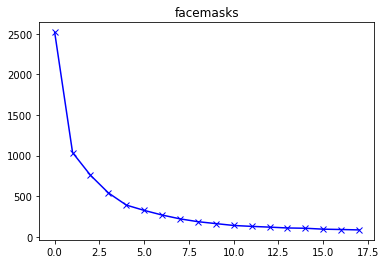

ppe%20kit
(360, 7)
[[-0.24761332 -0.1928927   7.31516585 ...  6.65587743  5.84190226
   5.4189758 ]
 [-0.24067232 -0.21365701  0.14543994 ...  0.13583423  0.02849708
  -0.19884631]
 [-0.2238156  -0.21365701  2.27698007 ...  1.85163507  2.25126965
   2.01423513]
 ...
 [ 0.25759239  0.51309367 -0.28086809 ... -0.29311598 -0.31346793
  -0.28396483]
 [ 0.25313031  0.30233597 -0.16460227 ... -0.20732593 -0.14248542
  -0.1137278 ]
 [-0.19307689 -0.35520036  0.61050324 ...  0.39320436  0.37046209
   1.16304996]]


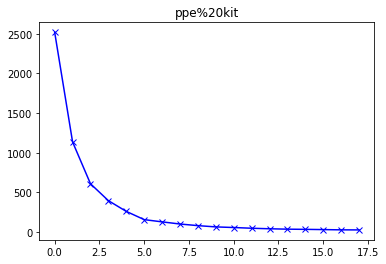

handsanitizers
(360, 7)
[[-0.45178088 -0.73958004 -0.09044684 ... -0.09578239 -0.08891997
  -0.08926712]
 [ 3.71451978 -0.73958004 -0.09044684 ... -0.09578239 -0.08891997
  -0.08926712]
 [-0.73328768 -0.73958004 -0.09044684 ... -0.09578239 -0.08891997
  -0.08926712]
 ...
 [-0.7918411  -0.63549162 -0.09044684 ... -0.09578239 -0.08891997
  -0.08926712]
 [ 0.09997245  0.30026329 -0.09044684 ... -0.09578239 -0.08891997
  -0.08926712]
 [-0.2040549  -0.32322635 -0.09044684 ... -0.09578239 -0.08891997
  -0.08926712]]


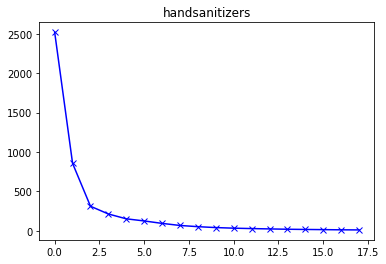

handwash
(360, 7)
[[-0.22681502 -0.06528938 -0.09153321 ... -0.08638684 -0.08481889
  -0.08609233]
 [-0.8136465  -0.50517406 -0.09153321 ... -0.08638684 -0.08481889
  -0.08609233]
 [-0.22681502 -0.06281811 -0.09153321 ... -0.08638684 -0.08481889
  -0.08609233]
 ...
 [-0.47831423 -0.20615132 -0.09153321 ... -0.08638684 -0.08481889
  -0.08609233]
 [ 0.32229157  0.68350309 -0.09153321 ... -0.08638684 -0.08481889
  -0.08609233]
 [ 0.02468418 -0.79925427 -0.09153321 ... -0.08638684 -0.08481889
  -0.08609233]]


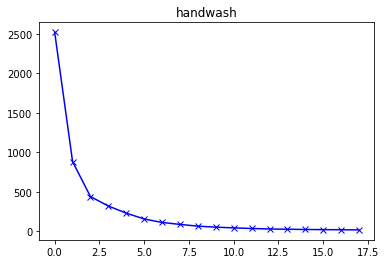

In [ ]:
scaler = StandardScaler()
valid_ones_flip=[]
for i in list(flip_pan['product'].unique()):
  print(i)
  df_scaled = scaler.fit_transform(flip_pan[['discounted','mrp','star5',"star4",'star3','star2','star1']][flip_pan['product']==i])
  print(df_scaled.shape)
  df_scaled=np.nan_to_num(df_scaled)
  print(df_scaled)
  
  scores = []
  try:
    for j in range(1,19):
        kmeans = KMeans(n_clusters=j)
        kmeans.fit(df_scaled)
        scores.append(kmeans.inertia_)
    plt.title(i)
    plt.plot(scores, 'bx-')
    plt.show()
    valid_ones_flip.append(i)
  except:
    print(i+' : '+str(sys.exc_info()))

In [ ]:
flip_pan['product'].unique()

array(['facemasks', 'ppe%20kit', 'handsanitizers', 'handwash'],
      dtype=object)

In [ ]:
kmeans_dict={'facemasks':3, 'ppe%20kit':3, 'handsanitizers':3, 'handwash':3}
list(kmeans_dict.keys())

['facemasks', 'ppe%20kit', 'handsanitizers', 'handwash']

facemasks
(360, 7)
facemasks : (3, 7)
   discounted       mrp      star5      star4      star3      star2      star1
0    2.690178  3.314016  -0.166828  -0.163411  -0.185191  -0.203734  -0.205100
1   -0.118385 -0.143535  -0.043119  -0.043654  -0.041956  -0.040628  -0.040298
2    0.371914 -0.334100  17.335357  17.468031  17.210735  17.032081  16.939051


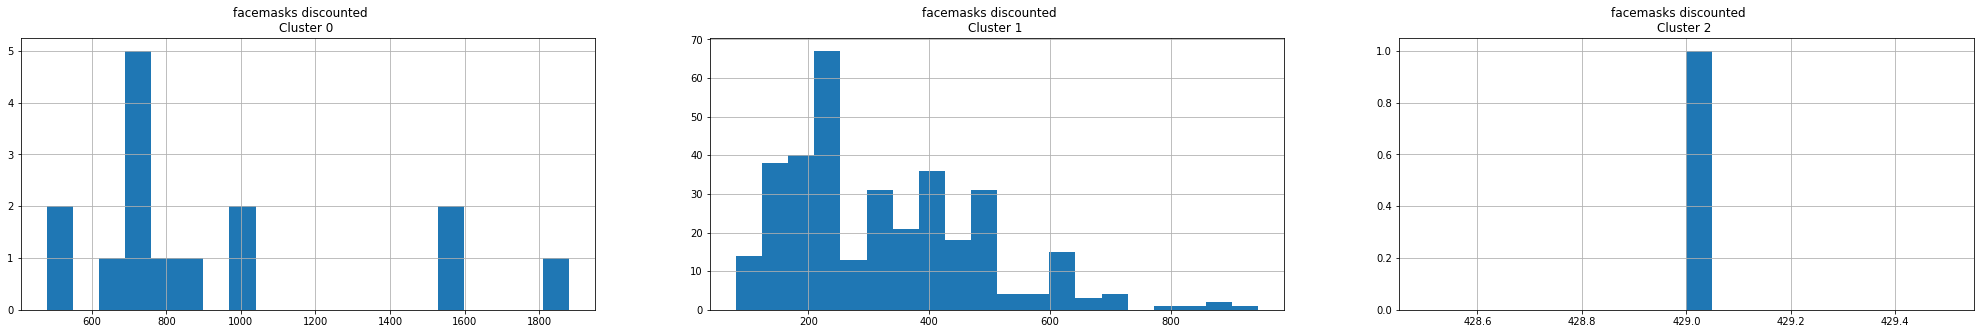

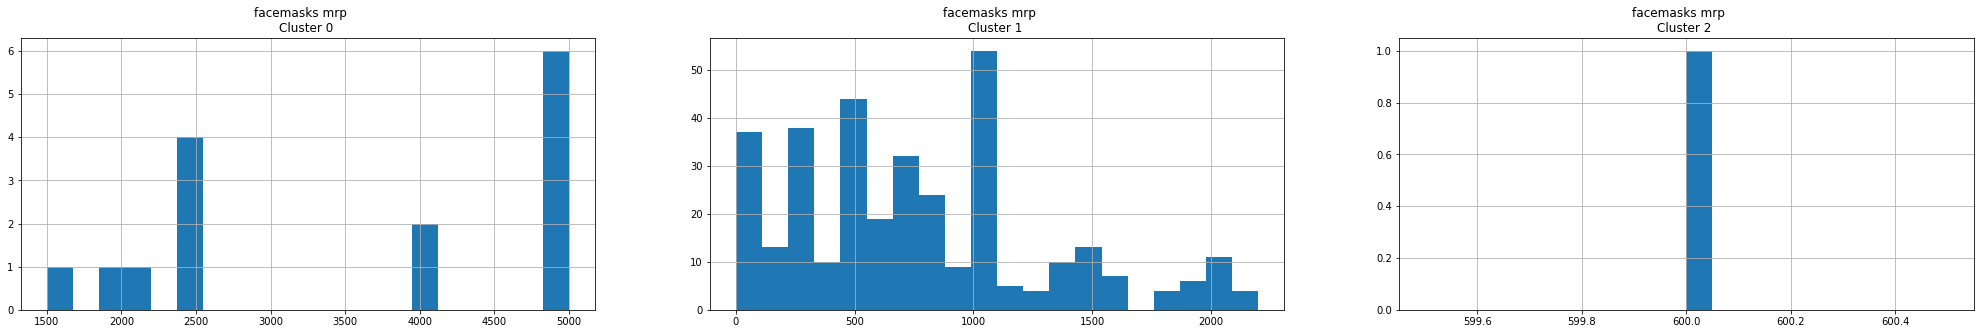

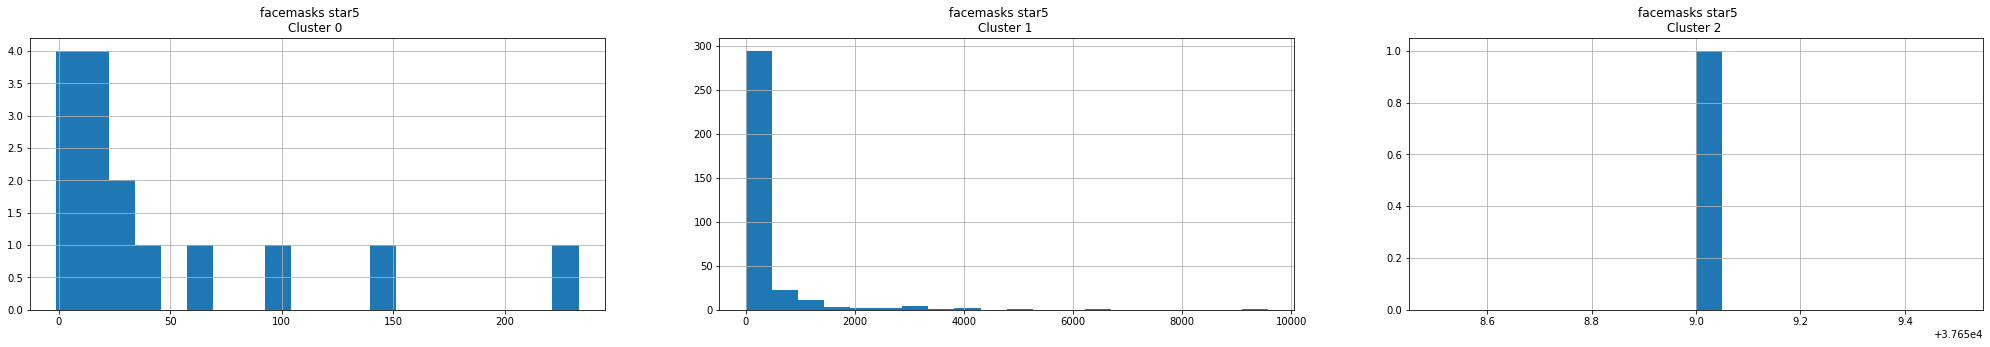

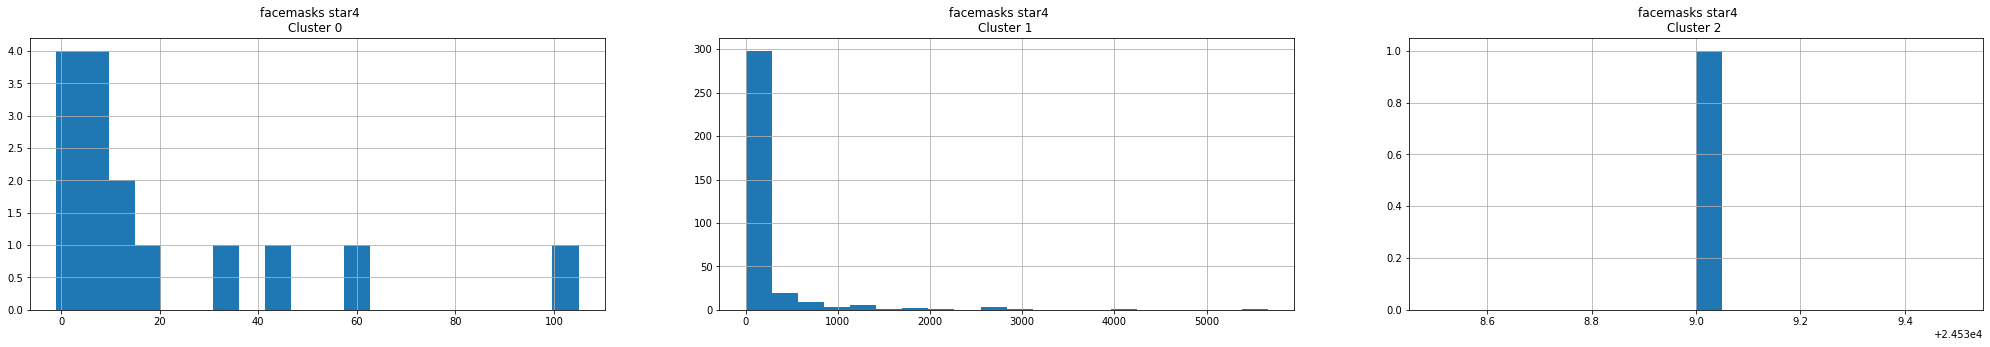

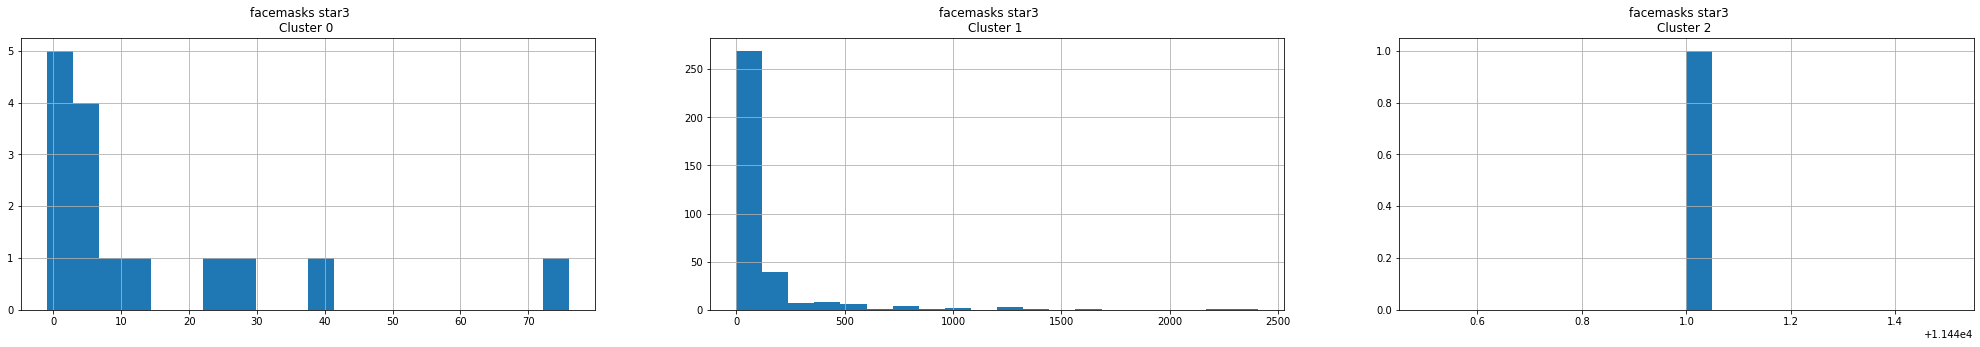

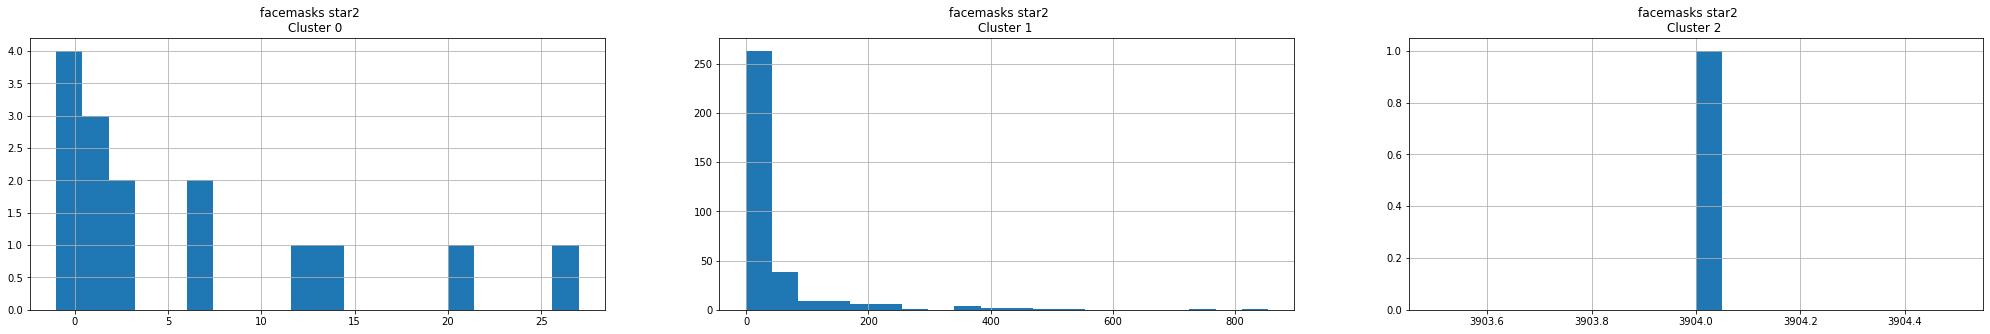

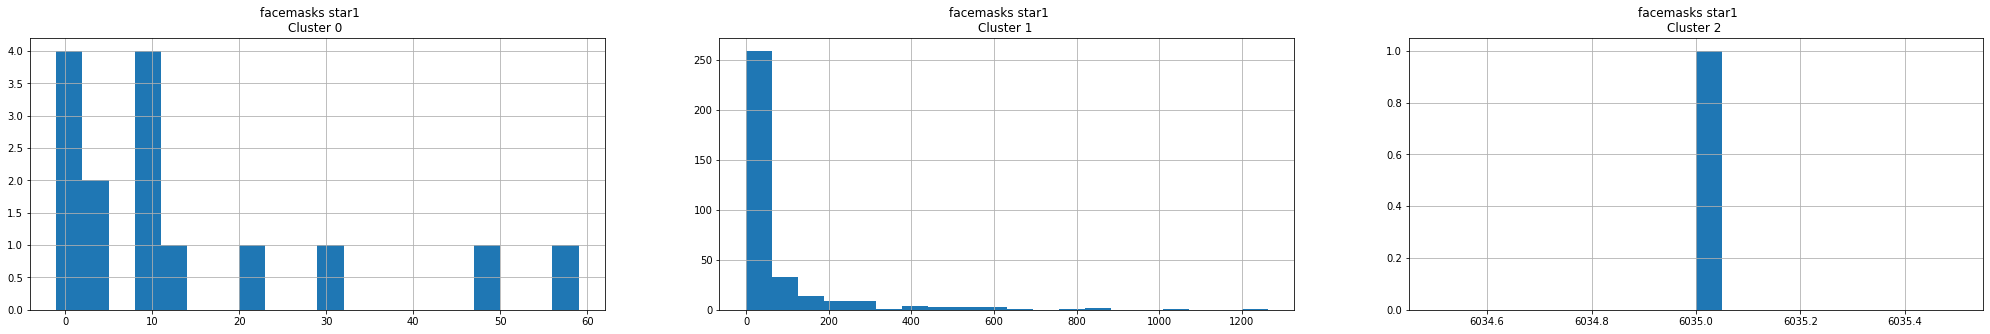

ppe%20kit
(360, 7)
ppe%20kit : (3, 7)
   discounted        mrp     star5     star4     star3     star2     star1
0   -0.041115  -0.036203 -0.193302 -0.193562 -0.192569 -0.184857 -0.178745
1   -0.182046  -0.186036  4.161455  4.166756  4.146519  3.982468  3.849603
2   17.015152  15.394179 -0.280868 -0.276398 -0.293116 -0.313468 -0.283965


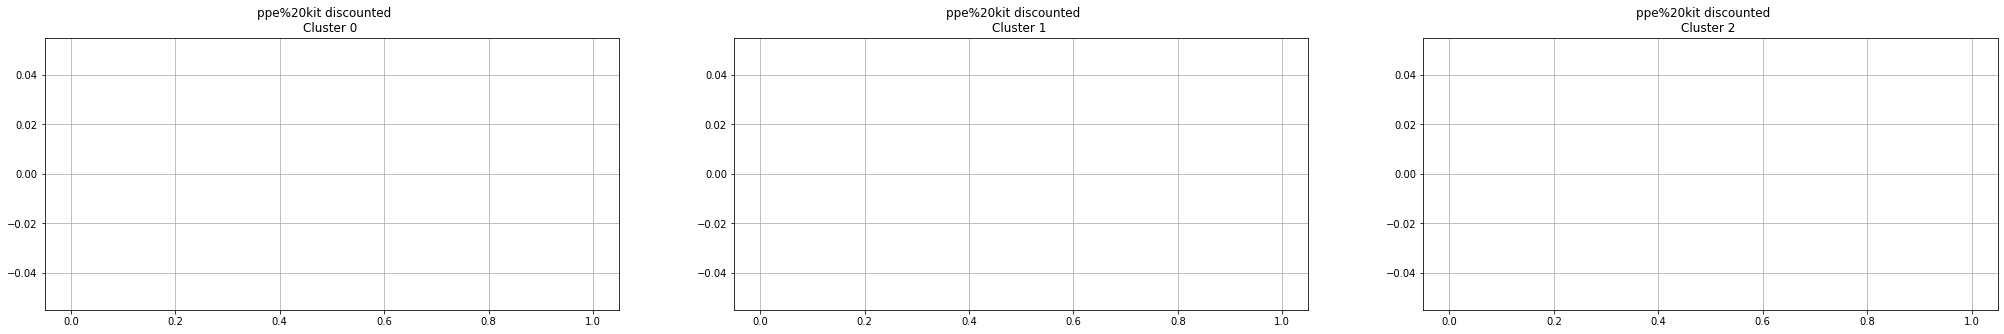

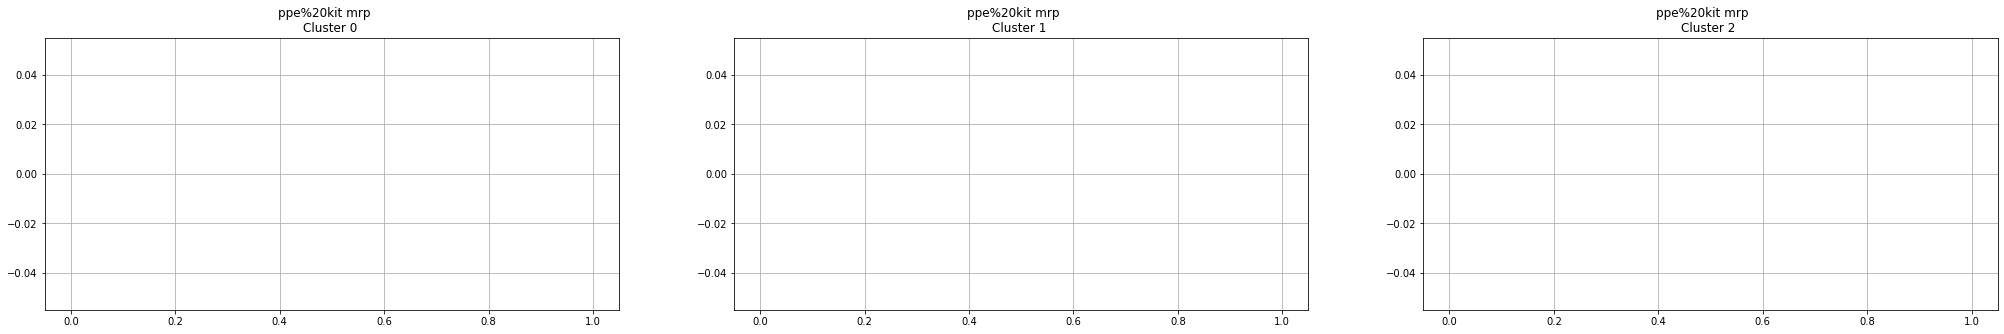

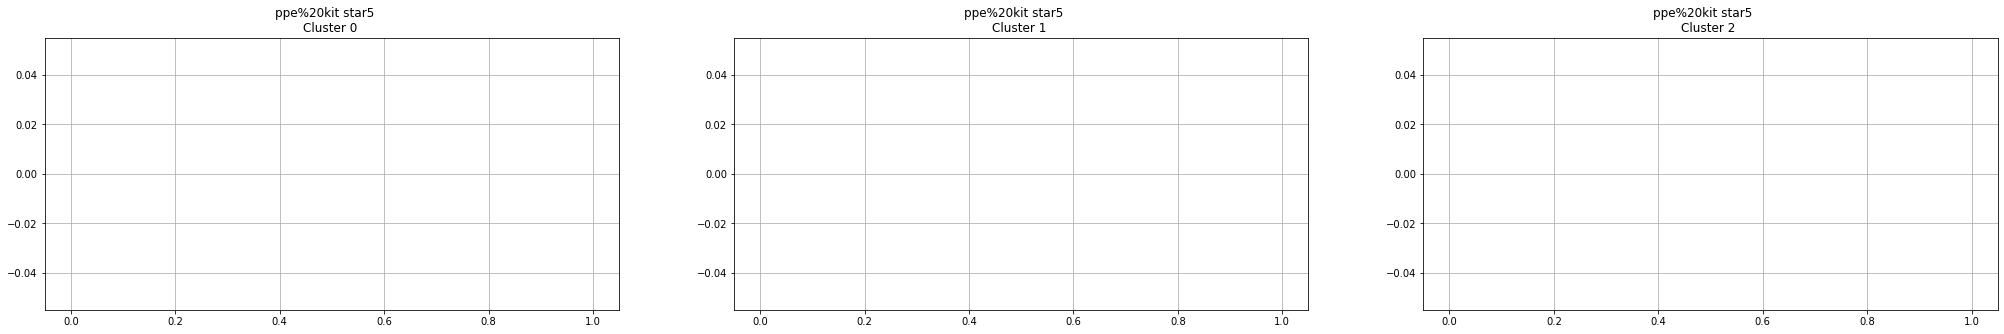

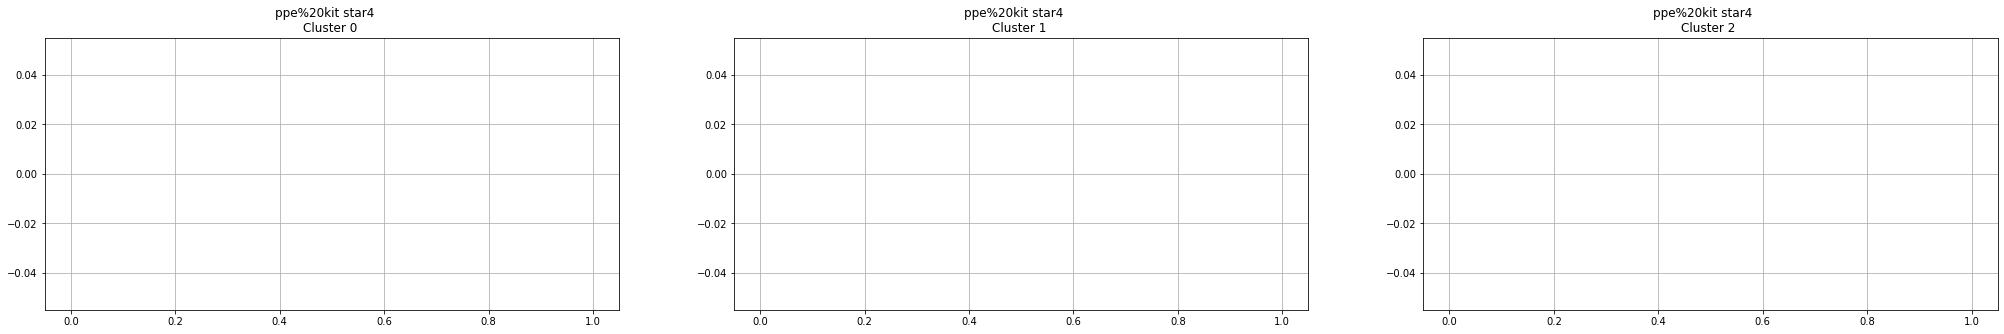

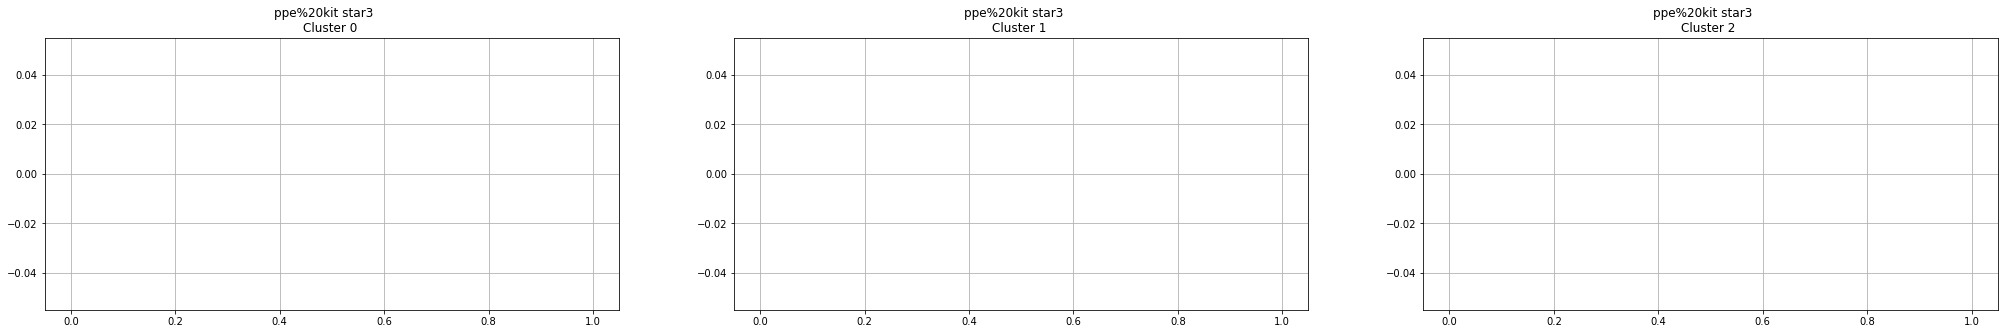

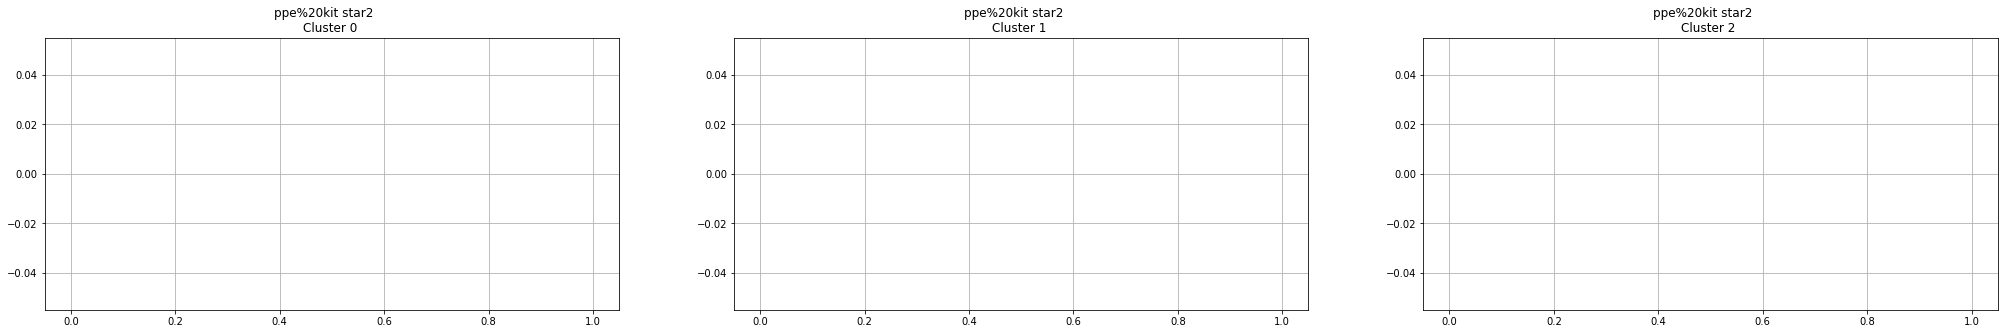

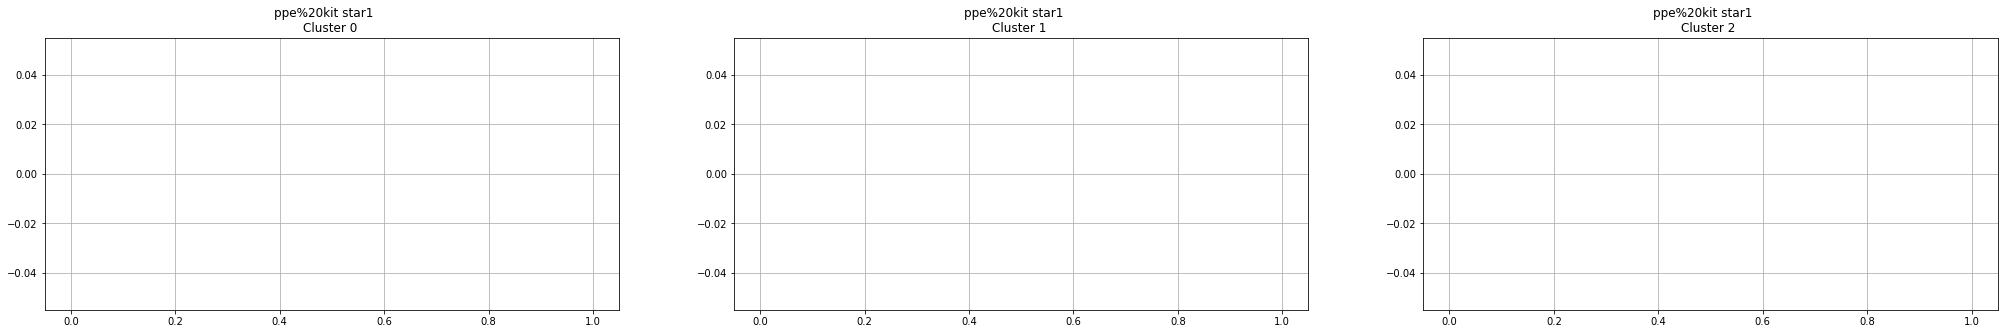

handsanitizers
(360, 7)
handsanitizers : (3, 7)
   discounted       mrp      star5      star4      star3      star2      star1
0   -0.410370 -0.455309  -0.067288  -0.066428  -0.062341  -0.069168  -0.069894
1   -0.819992 -0.630287  12.878238  12.702887  12.362920  13.092157  13.208455
2    1.652858  1.826098  -0.090447  -0.088990  -0.095782  -0.088920  -0.089267


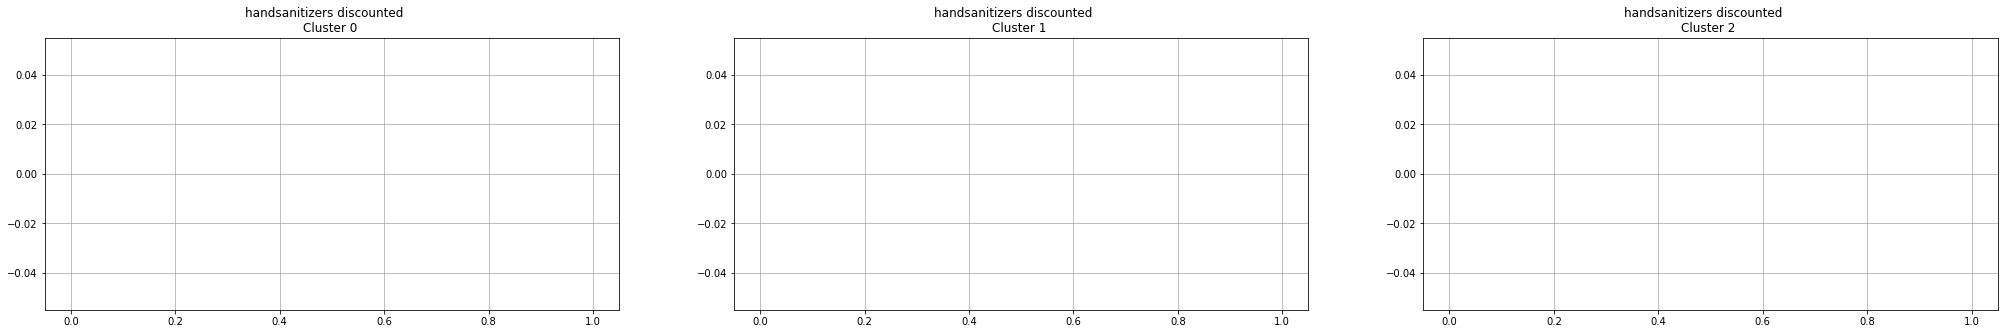

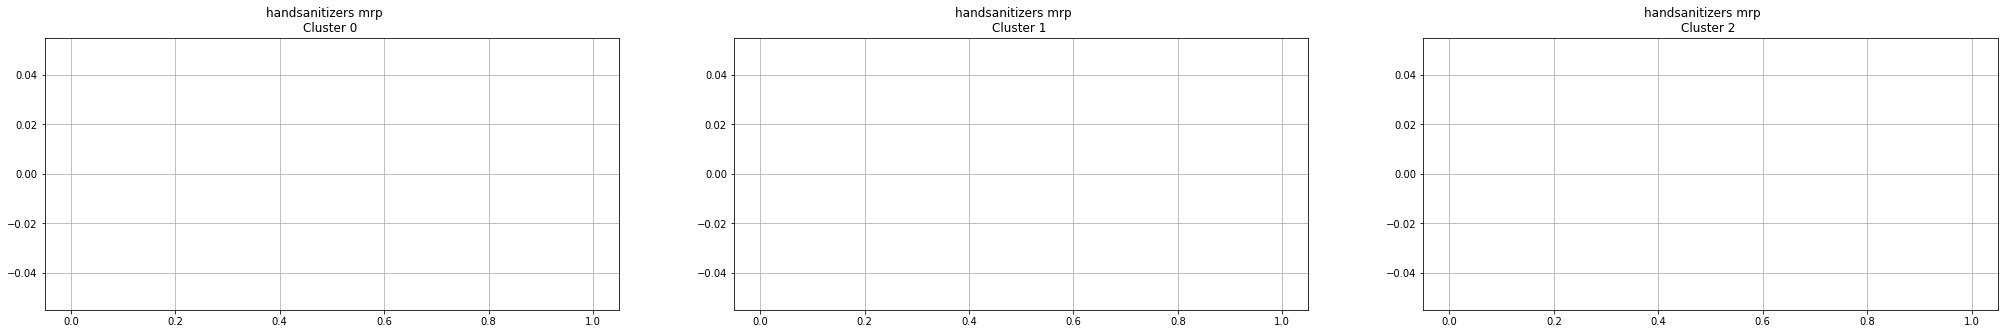

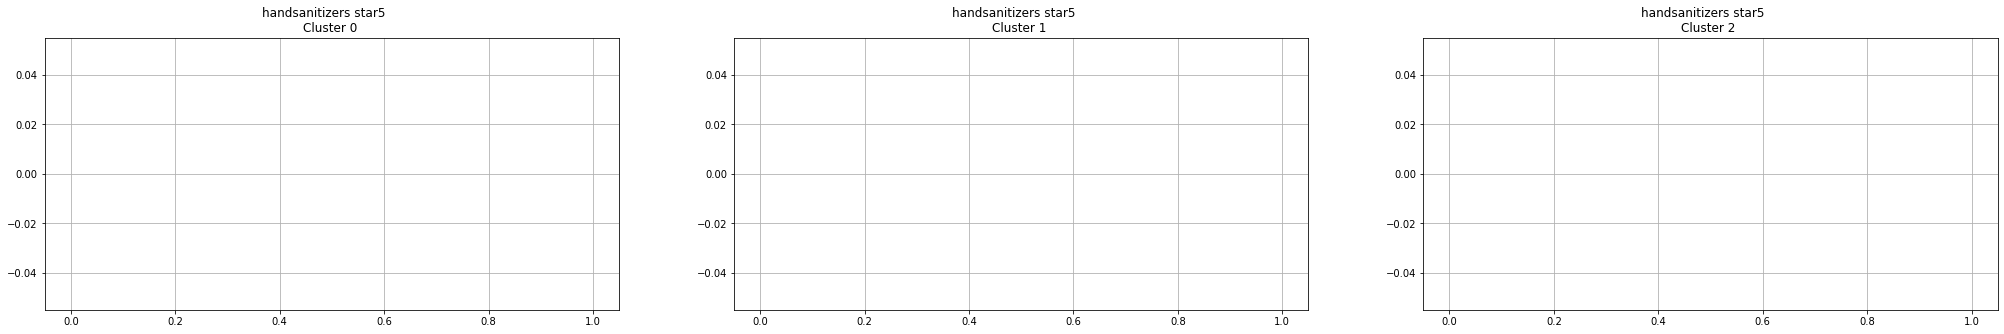

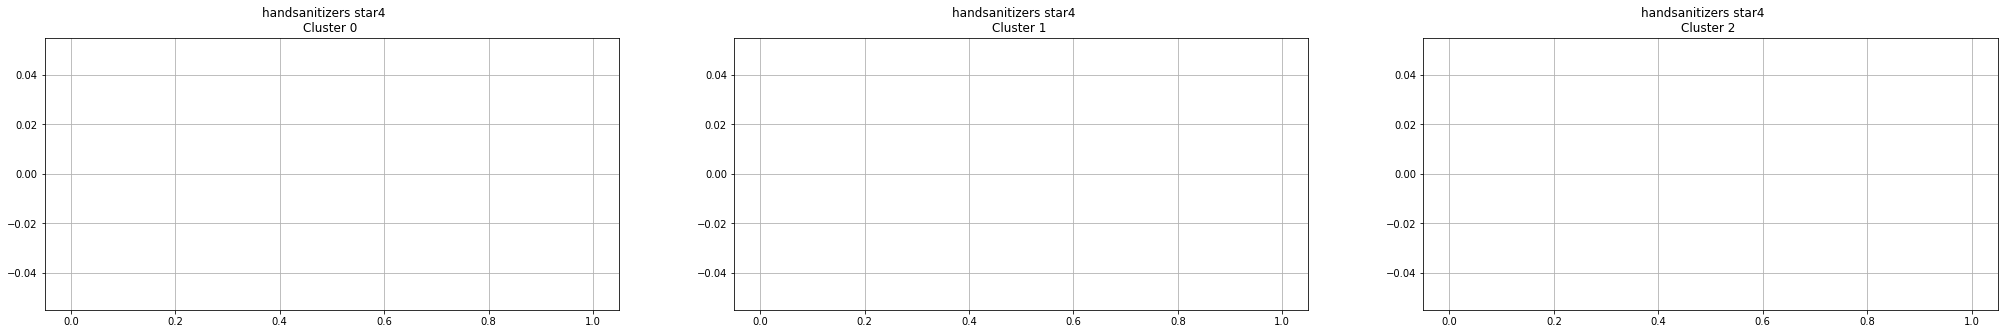

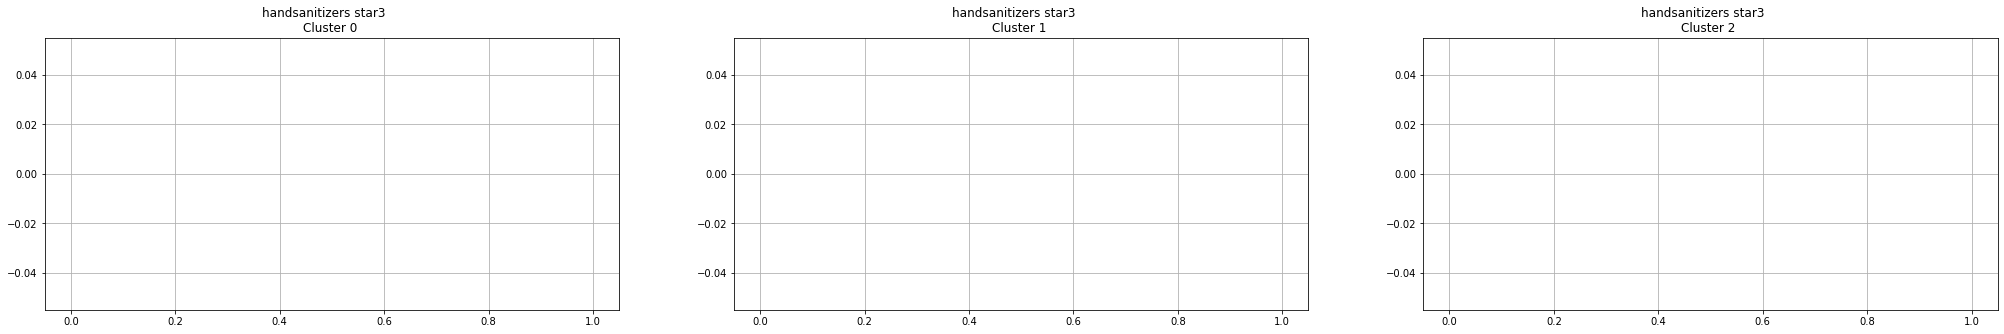

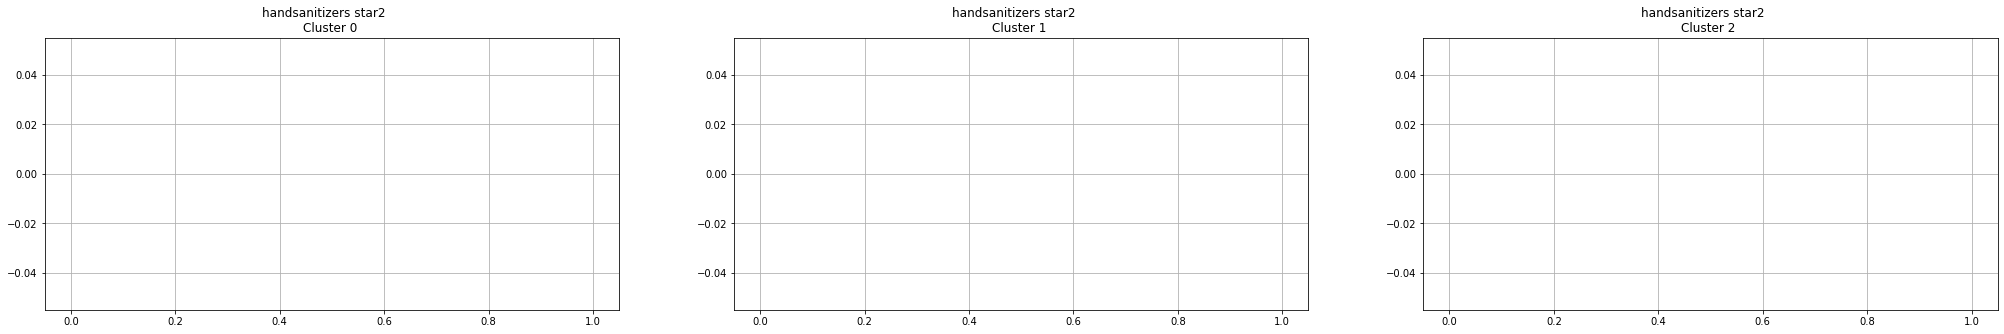

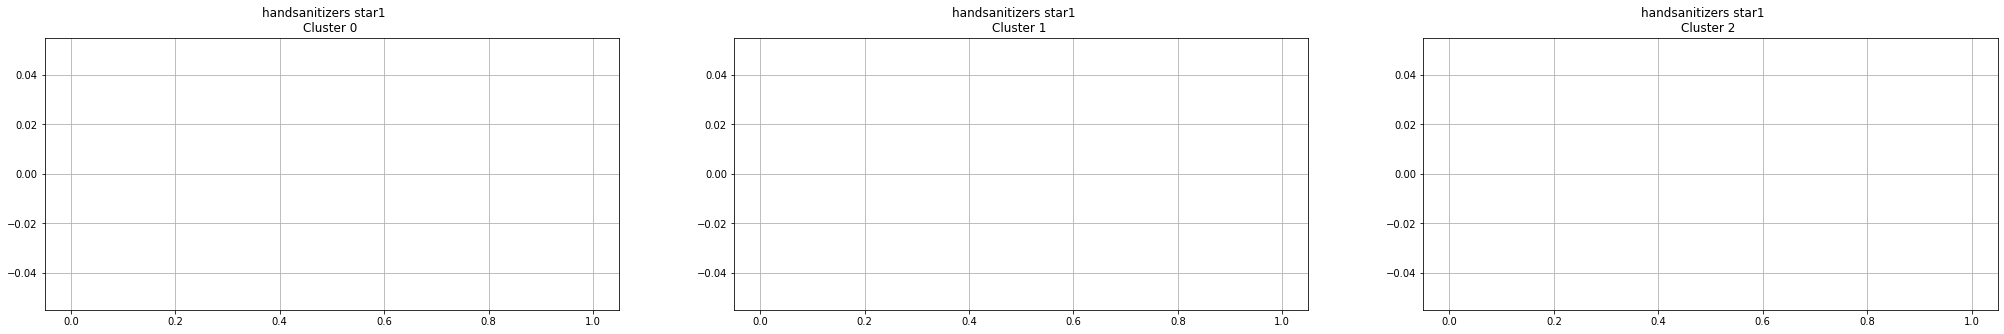

handwash
(360, 7)
handwash : (3, 7)
   discounted       mrp      star5      star4      star3      star2      star1
0   -0.290025 -0.293159  -0.091533  -0.088065  -0.086387  -0.084819  -0.086092
1   -0.521628 -0.469753  10.892452  10.479770  10.280034  10.093448  10.244987
2    2.098695  2.117453  -0.091533  -0.088065  -0.086387  -0.084819  -0.086092


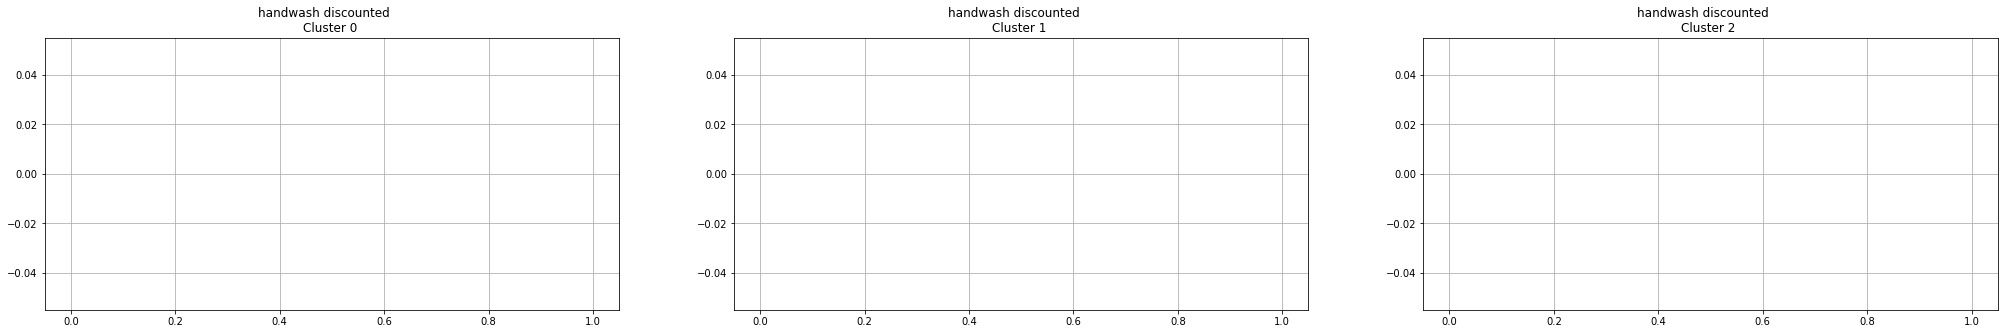

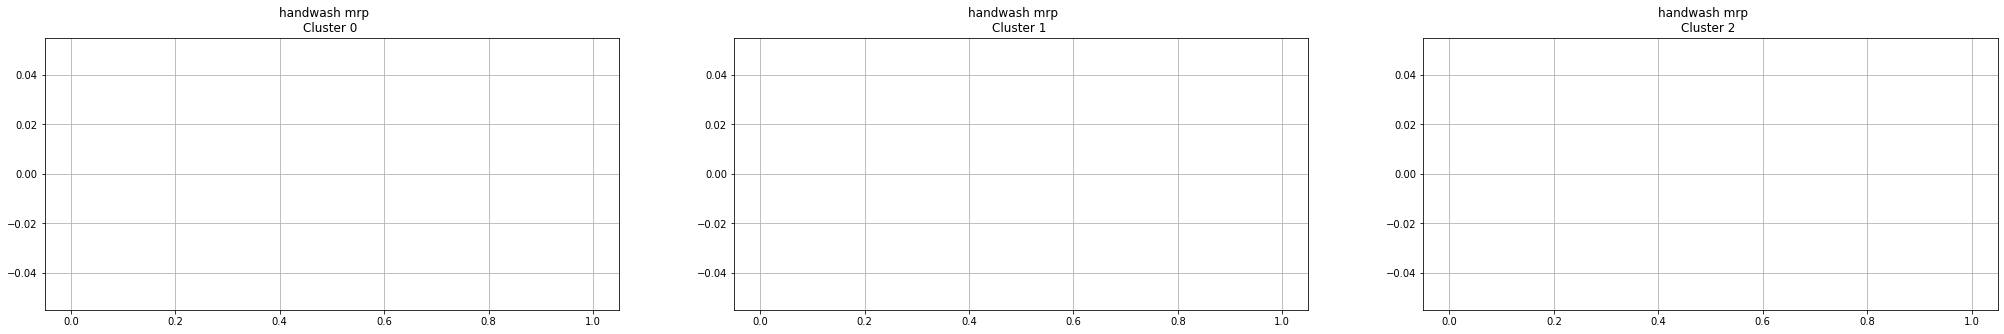

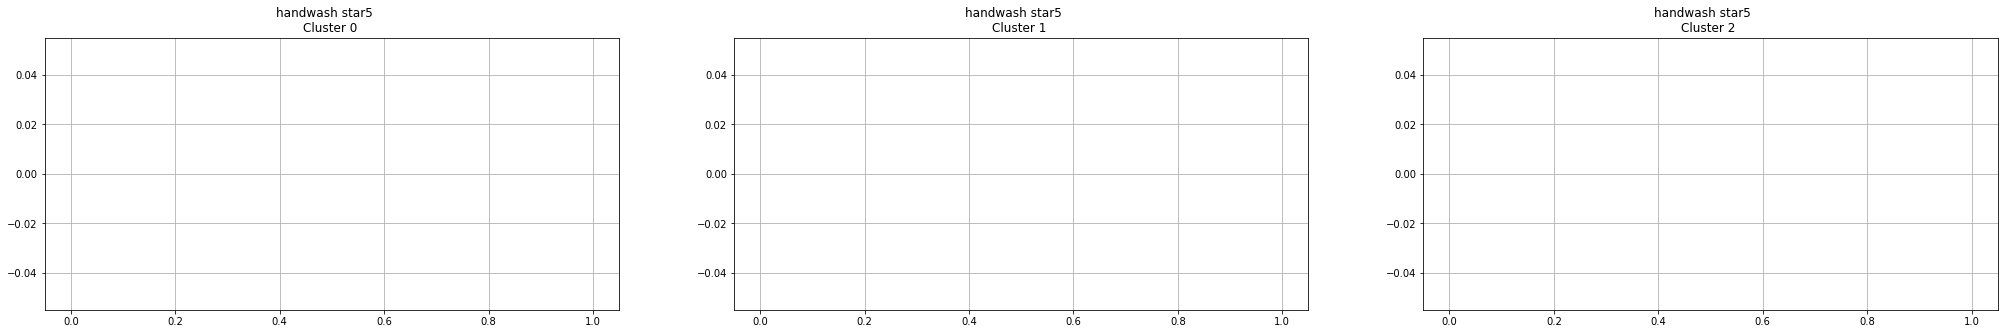

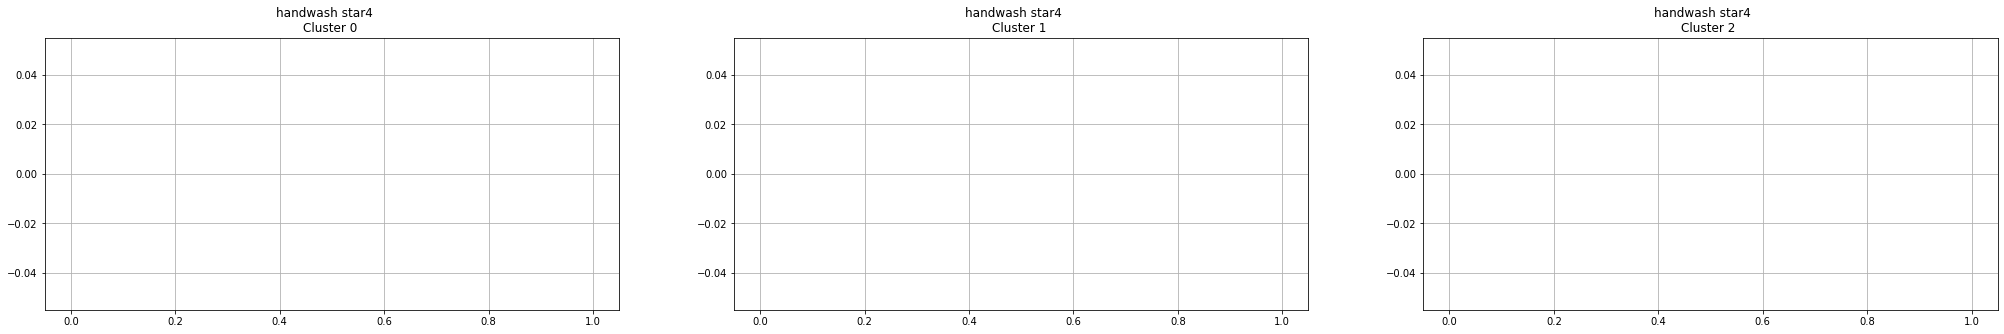

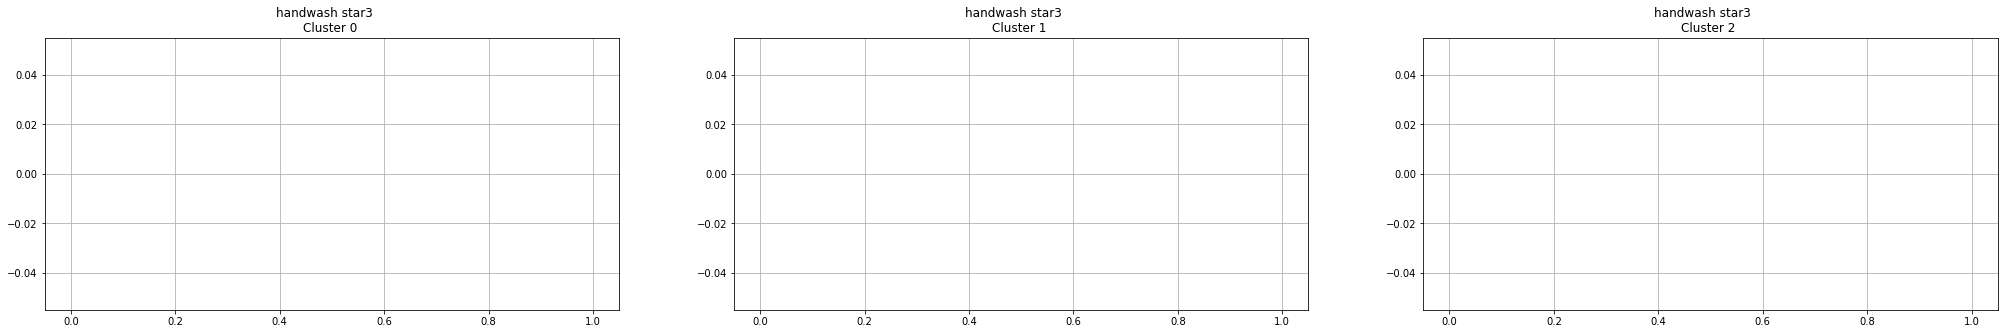

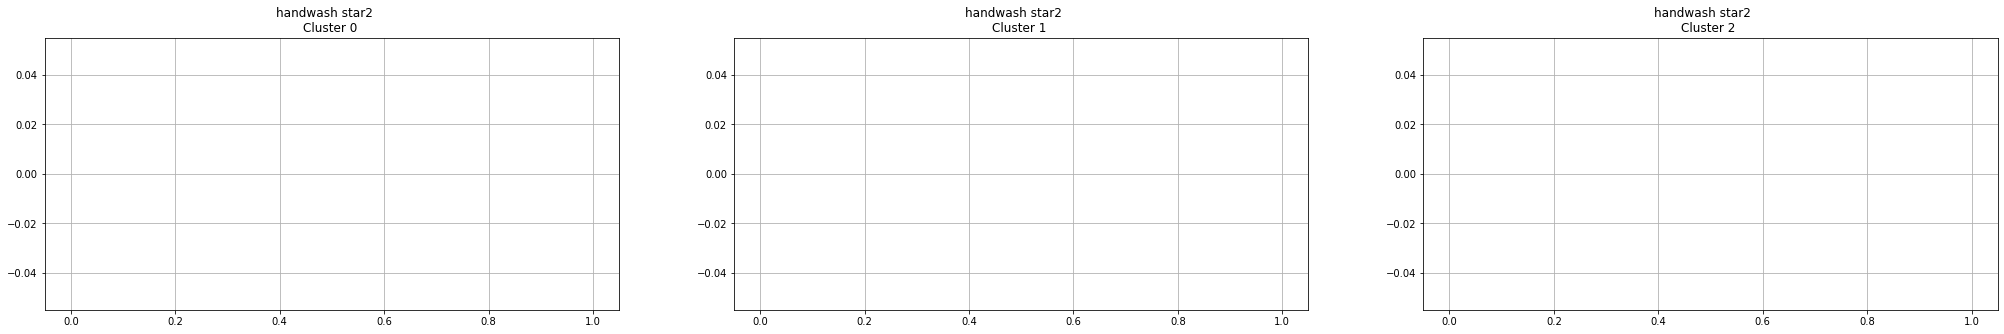

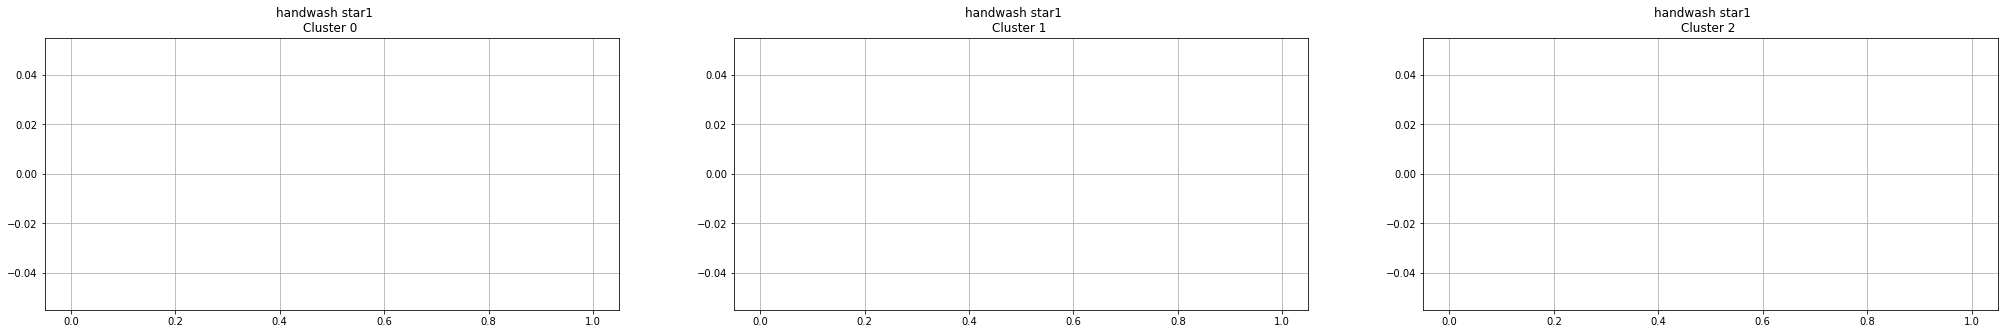

In [ ]:
columnsss=['discounted','mrp','star5',"star4",'star3','star2','star1']
kmeans_dict={'facemasks':3, 'ppe%20kit':3, 'handsanitizers':3, 'handwash':3}
labels_dict={}
for i in list(list(kmeans_dict.keys())):
  print(i)
  df_scaled = scaler.fit_transform(flip_pan[columnsss][flip_pan['product']==i])
  print(df_scaled.shape)
  df_scaled=np.nan_to_num(df_scaled)
  kmeans = KMeans(kmeans_dict[i])
  kmeans.fit(df_scaled)
  labels = kmeans.labels_
  labels_dict[i]=labels
  print(i+' : '+str(kmeans.cluster_centers_.shape))
  cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = columnsss)
  print(cluster_centers)
  df_cluster = pd.concat([flip_pan[columnsss][flip_pan['product']==i], pd.DataFrame({'cluster':labels})], axis = 1)
  for j in columnsss:
    plt.figure(figsize = (35, 5))
    for k in range(kmeans_dict[i]):
      plt.subplot(1,kmeans_dict[i],k+1)
      cluster = df_cluster[df_cluster['cluster'] == k]
      cluster[j].hist(bins = 20)
      plt.title(i+' {}    \nCluster {} '.format(j,k))
    
    plt.show()

# **Principal Component Analysis**

### **Amazon**

facemasks
7
['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.



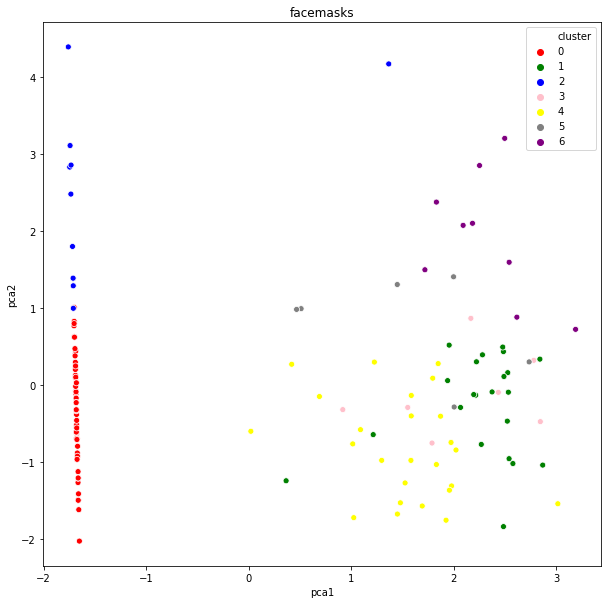

Skin Care
5
['red', 'green', 'blue', 'pink', 'yellow']


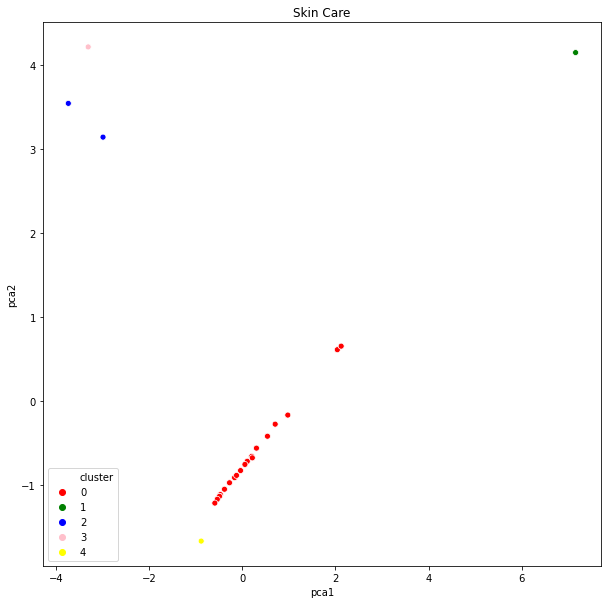

medical equipment
7
['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple']


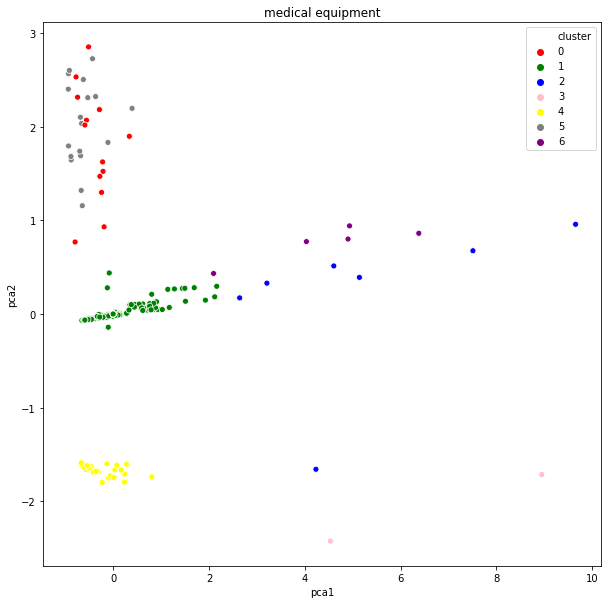

In [ ]:
palette =['red','green','blue','pink','yellow','gray','purple','black', 'magenta','cyan' ]
for i in valid_ones_amz:
  print(i)
  df_scaled = scaler.fit_transform(amz_all[['mrp_then','price_then','price_now','mrp_now','star5',"star4",'star3','star2','star1']][amz_all['product']==i])
  df_scaled=np.nan_to_num(df_scaled)
  pca = PCA(n_components=2)
  principal_comp = pca.fit_transform(df_scaled)
  pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
  pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels_dict_amz[i]})], axis = 1)
  plt.figure(figsize=(10,10))
  print(kmeans_dict_amz[i])
  print(palette[:kmeans_dict_amz[i]])
  ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette=palette[:kmeans_dict_amz[i]])
  plt.title(i)
  plt.show()

### **Flipkart**

facemasks
3
['red', 'green', 'blue']


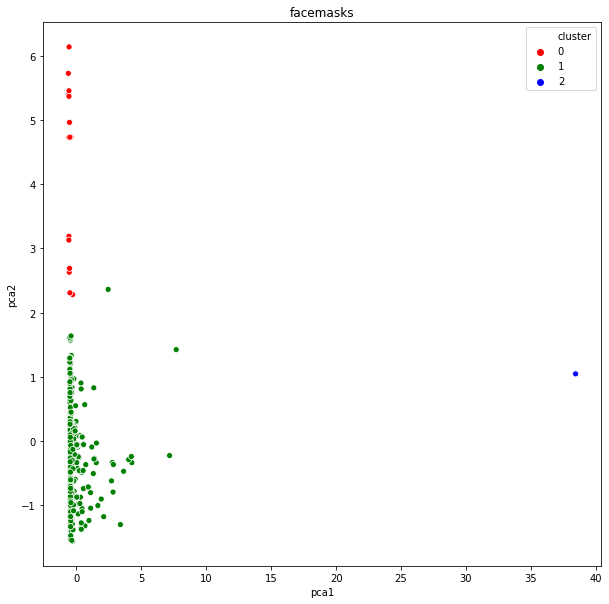

ppe%20kit
3
['red', 'green', 'blue']


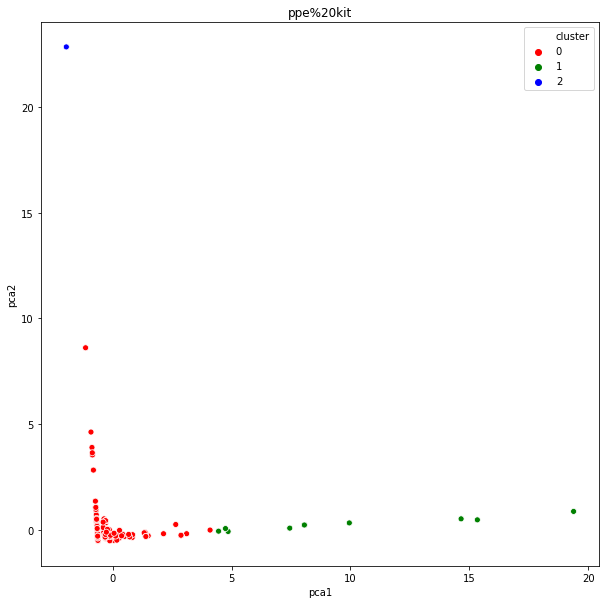

handsanitizers
3
['red', 'green', 'blue']


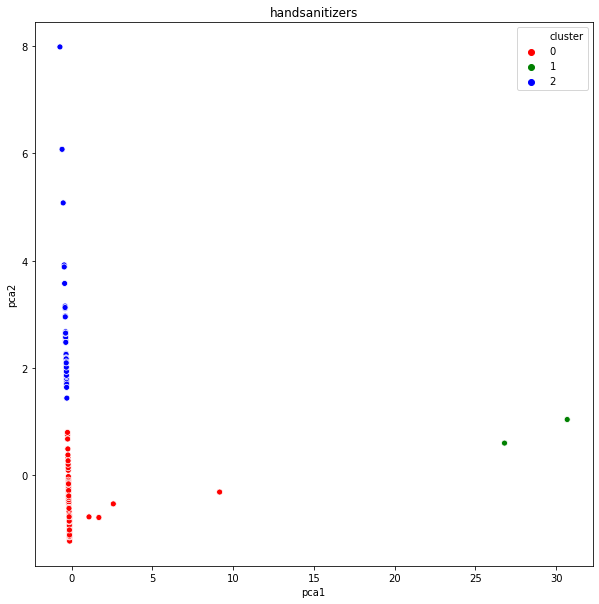

handwash
3
['red', 'green', 'blue']


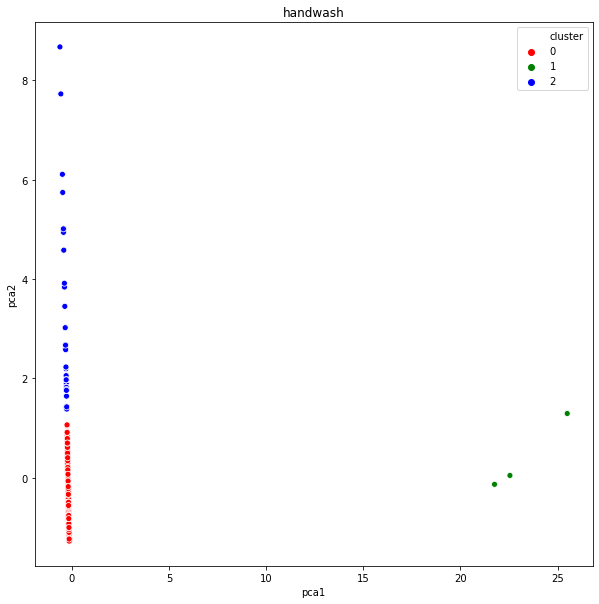

In [ ]:
palette =['red','green','blue','pink','yellow','gray','purple','black', 'magenta','cyan' ]
columnsss=['discounted','mrp','star5',"star4",'star3','star2','star1']
kmeans_dict={'facemasks':3, 'ppe%20kit':3, 'handsanitizers':3, 'handwash':3}
for i in valid_ones_flip:
  print(i)
  df_scaled = scaler.fit_transform(flip_pan[columnsss][flip_pan['product']==i])
  df_scaled=np.nan_to_num(df_scaled)
  pca = PCA(n_components=2)
  principal_comp = pca.fit_transform(df_scaled)
  pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
  pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels_dict[i]})], axis = 1)
  plt.figure(figsize=(10,10))
  print(kmeans_dict[i])
  print(palette[:kmeans_dict[i]])
  ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette=palette[:kmeans_dict[i]])
  plt.title(i)
  plt.show()

# **Generating Revised Datasets for Next Step**

In [ ]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [ ]:
x=[amz_all,flip_pan]
for i in x:
  i.to_csv(str( get_df_name(i))+'.csv',index=False)